# Banxi Site Analysis

In [1]:
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag

import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import numpy as np

## Functions

In [2]:
def list_components(df):
    components = []
    for i in range(len(df.index)):
        if df['dir_comp_name'][i] not in components:
            components.append(df['dir_comp_name'][i])
    print(components)

In [3]:
def specimen_plot(site, comp, savestring=None):
    site_specimens = specimens[specimens['site']==site].copy()

    site_tc = site_specimens[site_specimens['dir_tilt_correction']==100]
    site_is = site_specimens[site_specimens['dir_tilt_correction']==0]
    
    if comp == 'LT':
        site_tc_comp = site_tc[(site_tc['dir_comp']=='LT')|(site_tc['dir_comp']=='MT')]
        site_is_comp = site_is[(site_is['dir_comp']=='LT')|(site_is['dir_comp']=='MT')]
    elif comp =='HT':
        site_tc_comp = site_tc[site_tc['dir_comp']=='HT']
        site_is_comp = site_is[site_is['dir_comp']=='HT']
    else:
        print('pick LT or HT')
        
    site_tc_comp_dec_vec = site_tc_comp[site_tc_comp['dir_bfv_dec'].isnull()]['dir_dec'].tolist()
    site_tc_comp_inc_vec = site_tc_comp[site_tc_comp['dir_bfv_dec'].isnull()]['dir_inc'].tolist()
    
    site_is_comp_dec_vec = site_is_comp[site_is_comp['dir_bfv_dec'].isnull()]['dir_dec'].tolist()
    site_is_comp_inc_vec = site_is_comp[site_is_comp['dir_bfv_dec'].isnull()]['dir_inc'].tolist()
    
    site_tc_comp_dec_bfv = site_tc_comp[~site_tc_comp['dir_bfv_dec'].isnull()]['dir_bfv_dec'].tolist()
    site_tc_comp_inc_bfv = site_tc_comp[~site_tc_comp['dir_bfv_dec'].isnull()]['dir_bfv_inc'].tolist()
    
    site_is_comp_dec_bfv = site_is_comp[~site_is_comp['dir_bfv_dec'].isnull()]['dir_bfv_dec'].tolist()
    site_is_comp_inc_bfv = site_is_comp[~site_is_comp['dir_bfv_dec'].isnull()]['dir_bfv_inc'].tolist()
    
    site_tc_comp_dec = site_tc_comp_dec_vec + site_tc_comp_dec_bfv
    site_tc_comp_inc = site_tc_comp_inc_vec + site_tc_comp_inc_bfv
    
    site_is_comp_dec = site_is_comp_dec_vec + site_is_comp_dec_bfv
    site_is_comp_inc = site_is_comp_inc_vec + site_is_comp_inc_bfv
    
    site_tc_comp_mean = ipmag.fisher_mean(site_tc_comp_dec, site_tc_comp_inc)
    site_is_comp_mean = ipmag.fisher_mean(site_is_comp_dec, site_is_comp_inc)
    
    print('n vectors = {}'.format(len(site_tc_comp_dec_vec)))
    print('n planes  = {}'.format(len(site_tc_comp_dec_bfv)))
    
    if len(site_tc_comp_dec)>1:
        print('tilt-corrected alpha95 = {:.2f}'.format(site_tc_comp_mean['alpha95']))
        print('geographic     alpha95 = {:.2f}'.format(site_is_comp_mean['alpha95']))
    if len(site_tc_comp_dec)>1:
        print('tilt-corrected k = {:.2f}'.format(site_tc_comp_mean['k']))
        print('geographic     k = {:.2f}'.format(site_is_comp_mean['k']))
    
    fignum = 1
    plt.figure(num=fignum,figsize=(5,5))
    ipmag.plot_net(fignum)
    
    ipmag.plot_di(site_tc_comp_dec_vec, site_tc_comp_inc_vec,
                  color='C0', marker='o', markersize=40, label='tilt-corrected vector')
    ipmag.plot_di(site_tc_comp_dec_bfv, site_tc_comp_inc_bfv,
                  color='C0', marker='^', markersize=40, label='tilt-corrected plane')
    ipmag.plot_di(site_is_comp_dec_vec, site_is_comp_inc_vec,
                  color='C1', marker='o', markersize=40, label='geographic vector')
    ipmag.plot_di(site_is_comp_dec_bfv, site_is_comp_inc_bfv,
                  color='C1', marker='^', markersize=40, label='geographic plane')
    
    if len(site_tc_comp_dec)>1:
        ipmag.plot_di_mean(site_tc_comp_mean['dec'], site_tc_comp_mean['inc'], site_tc_comp_mean['alpha95'],
                           color='k', marker='s')
        ipmag.plot_di_mean(site_is_comp_mean['dec'], site_is_comp_mean['inc'], site_is_comp_mean['alpha95'],
                           color='k', marker='s')
    
    plt.title('{} - {}'.format(site, comp))
    plt.legend(loc='middle left', bbox_to_anchor=(1.02,0.5))
    
    if savestring!=None:
        plt.savefig('Output/'+savestring, bbox_inches='tight')
    
    plt.show()

In [4]:
def BJ_specimen_plot(site, comp, bed_strike, bed_dip, savestring=None):
    site_specimens = specimensBJ[specimensBJ['site']==site].copy()
    site_samples = samplesBJ[samplesBJ['site']==site].copy()

    site_is = site_specimens[site_specimens['dir_tilt_correction']==0]
    
    old_bed_dip_dir = site_samples['bed_dip_direction'].tolist()
    old_bed_dip = site_samples['bed_dip'].tolist()
    
    if comp == 'LT':
        site_is_comp = site_is[(site_is['dir_comp']=='LT')|(site_is['dir_comp']=='MT')]
    elif comp =='HT':
        site_is_comp = site_is[site_is['dir_comp']=='HT']
    else:
        print('pick LT or HT')
    
    site_is_comp_dec_vec = site_is_comp[site_is_comp['dir_bfv_dec'].isnull()]['dir_dec'].tolist()
    site_is_comp_inc_vec = site_is_comp[site_is_comp['dir_bfv_dec'].isnull()]['dir_inc'].tolist()
    
    site_is_comp_dec_bfv = site_is_comp[~site_is_comp['dir_bfv_dec'].isnull()]['dir_bfv_dec'].tolist()
    site_is_comp_inc_bfv = site_is_comp[~site_is_comp['dir_bfv_dec'].isnull()]['dir_bfv_inc'].tolist()
    
    site_is_comp_dec = site_is_comp_dec_vec + site_is_comp_dec_bfv
    site_is_comp_inc = site_is_comp_inc_vec + site_is_comp_inc_bfv
    
    site_is_comp_mean = ipmag.fisher_mean(site_is_comp_dec, site_is_comp_inc)
    
    site_tc_comp_dec_vec = []
    site_tc_comp_inc_vec = []
    for i in range(len(site_is_comp_dec_vec)):
        dec_vec, inc_vec = pmag.dotilt(site_is_comp_dec_vec[i], site_is_comp_inc_vec[i],
                                       (bed_strike+90)%360, bed_dip)
        site_tc_comp_dec_vec.append(dec_vec)
        site_tc_comp_inc_vec.append(inc_vec)
        
    site_tc_comp_dec_bfv = []
    site_tc_comp_inc_bfv = []
    for i in range(len(site_is_comp_dec_bfv)):
        dec_bfv, inc_bfv = pmag.dotilt(site_is_comp_dec_bfv[i], site_is_comp_inc_bfv[i],
                                       (bed_strike+90)%360, bed_dip)
        site_tc_comp_dec_bfv.append(dec_bfv)
        site_tc_comp_inc_bfv.append(inc_bfv)
    
    site_tc_comp_dec = site_tc_comp_dec_vec + site_tc_comp_dec_bfv
    site_tc_comp_inc = site_tc_comp_inc_vec + site_tc_comp_inc_bfv
    
    site_tc_comp_mean = ipmag.fisher_mean(site_tc_comp_dec, site_tc_comp_inc)
    
    print('old bed dip direction = ' + str(old_bed_dip_dir))
    print('old bed dip           = ' + str(old_bed_dip))
    print('')
    print('new bed dip direction = {:.2f}'.format((bed_strike+90)%360))
    print('new bed dip           = {:.2f}'.format(bed_dip))
    print('')
    
    print('n vectors = {}'.format(len(site_tc_comp_dec_vec)))
    print('n planes  = {}'.format(len(site_tc_comp_dec_bfv)))
    
    if len(site_tc_comp_dec)>1:
        print('tilt-corrected alpha95 = {:.2f}'.format(site_tc_comp_mean['alpha95']))
        print('geographic     alpha95 = {:.2f}'.format(site_is_comp_mean['alpha95']))
    if len(site_tc_comp_dec)>1:
        print('tilt-corrected k = {:.2f}'.format(site_tc_comp_mean['k']))
        print('geographic     k = {:.2f}'.format(site_is_comp_mean['k']))
    
    fignum = 1
    plt.figure(num=fignum,figsize=(5,5))
    ipmag.plot_net(fignum)
    
    ipmag.plot_di(site_tc_comp_dec_vec, site_tc_comp_inc_vec,
                  color='C0', marker='o', markersize=40, label='tilt-corrected vector')
    ipmag.plot_di(site_tc_comp_dec_bfv, site_tc_comp_inc_bfv,
                  color='C0', marker='^', markersize=40, label='tilt-corrected plane')
    ipmag.plot_di(site_is_comp_dec_vec, site_is_comp_inc_vec,
                  color='C1', marker='o', markersize=40, label='geographic vector')
    ipmag.plot_di(site_is_comp_dec_bfv, site_is_comp_inc_bfv,
                  color='C1', marker='^', markersize=40, label='geographic plane')
    
    if len(site_tc_comp_dec)>1:
        ipmag.plot_di_mean(site_tc_comp_mean['dec'], site_tc_comp_mean['inc'], site_tc_comp_mean['alpha95'],
                           color='k', marker='s')
        ipmag.plot_di_mean(site_is_comp_mean['dec'], site_is_comp_mean['inc'], site_is_comp_mean['alpha95'],
                           color='k', marker='s')
    
    plt.title('{} - {}'.format(site, comp))
    plt.legend(loc='middle left', bbox_to_anchor=(1.02,0.5))
    
    if savestring!=None:
        plt.savefig('Output/'+savestring, bbox_inches='tight')
    
    plt.show()

In [5]:
def get_BJ_site_mean(site, comp, bed_strike, bed_dip):
    site_specimens = specimensBJ[specimensBJ['site']==site].copy()
    site_samples = samplesBJ[samplesBJ['site']==site].copy()

    site_is = site_specimens[site_specimens['dir_tilt_correction']==0]
    
    old_bed_dip_dir = site_samples['bed_dip_direction'].tolist()
    old_bed_dip = site_samples['bed_dip'].tolist()
    
    if comp == 'LT':
        site_is_comp = site_is[(site_is['dir_comp']=='LT')|(site_is['dir_comp']=='MT')]
    elif comp =='HT':
        site_is_comp = site_is[site_is['dir_comp']=='HT']
    else:
        print('pick LT or HT')
    
    site_is_comp_dec_vec = site_is_comp[site_is_comp['dir_bfv_dec'].isnull()]['dir_dec'].tolist()
    site_is_comp_inc_vec = site_is_comp[site_is_comp['dir_bfv_dec'].isnull()]['dir_inc'].tolist()
    
    site_is_comp_dec_bfv = site_is_comp[~site_is_comp['dir_bfv_dec'].isnull()]['dir_bfv_dec'].tolist()
    site_is_comp_inc_bfv = site_is_comp[~site_is_comp['dir_bfv_dec'].isnull()]['dir_bfv_inc'].tolist()
    
    site_is_comp_dec = site_is_comp_dec_vec + site_is_comp_dec_bfv
    site_is_comp_inc = site_is_comp_inc_vec + site_is_comp_inc_bfv
    
    site_is_comp_mean = ipmag.fisher_mean(site_is_comp_dec, site_is_comp_inc)
    
    site_tc_comp_dec_vec = []
    site_tc_comp_inc_vec = []
    for i in range(len(site_is_comp_dec_vec)):
        dec_vec, inc_vec = pmag.dotilt(site_is_comp_dec_vec[i], site_is_comp_inc_vec[i],
                                       (bed_strike+90)%360, bed_dip)
        site_tc_comp_dec_vec.append(dec_vec)
        site_tc_comp_inc_vec.append(inc_vec)
        
    site_tc_comp_dec_bfv = []
    site_tc_comp_inc_bfv = []
    for i in range(len(site_is_comp_dec_bfv)):
        dec_bfv, inc_bfv = pmag.dotilt(site_is_comp_dec_bfv[i], site_is_comp_inc_bfv[i],
                                       (bed_strike+90)%360, bed_dip)
        site_tc_comp_dec_bfv.append(dec_bfv)
        site_tc_comp_inc_bfv.append(inc_bfv)
    
    site_tc_comp_dec = site_tc_comp_dec_vec + site_tc_comp_dec_bfv
    site_tc_comp_inc = site_tc_comp_inc_vec + site_tc_comp_inc_bfv
    
    site_tc_comp_mean = ipmag.fisher_mean(site_tc_comp_dec, site_tc_comp_inc)
    
    return(site_is_comp_mean, site_tc_comp_mean)

In [6]:
def specimen_plot_coordinate(site, coord, plf=False, savestring=None, markersize=20, meanmarkersize=20):
    site_specimens = specimens[specimens['site']==site].copy()
    
    if coord == 'tc':
        site_coord = site_specimens[site_specimens['dir_tilt_correction']==100]
    elif coord == 'is':
        site_coord = site_specimens[site_specimens['dir_tilt_correction']==0]
    else:
        print('pick tc or is')
        
    site_coord_LT = site_coord[(site_coord['dir_comp']=='LT')|(site_coord['dir_comp']=='MT')]
    site_coord_HT = site_coord[site_coord['dir_comp']=='HT']
        
    site_coord_LT_dec_vec = site_coord_LT[site_coord_LT['dir_bfv_dec'].isnull()]['dir_dec'].tolist()
    site_coord_LT_inc_vec = site_coord_LT[site_coord_LT['dir_bfv_dec'].isnull()]['dir_inc'].tolist()
    
    site_coord_HT_dec_vec = site_coord_HT[site_coord_HT['dir_bfv_dec'].isnull()]['dir_dec'].tolist()
    site_coord_HT_inc_vec = site_coord_HT[site_coord_HT['dir_bfv_dec'].isnull()]['dir_inc'].tolist()
        
    site_coord_LT_dec_bfv = site_coord_LT[~site_coord_LT['dir_bfv_dec'].isnull()]['dir_bfv_dec'].tolist()
    site_coord_LT_inc_bfv = site_coord_LT[~site_coord_LT['dir_bfv_dec'].isnull()]['dir_bfv_inc'].tolist()
    
    site_coord_HT_dec_bfv = site_coord_HT[~site_coord_HT['dir_bfv_dec'].isnull()]['dir_bfv_dec'].tolist()
    site_coord_HT_inc_bfv = site_coord_HT[~site_coord_HT['dir_bfv_dec'].isnull()]['dir_bfv_inc'].tolist()
    
    site_coord_LT_dec = site_coord_LT_dec_vec + site_coord_LT_dec_bfv
    site_coord_LT_inc = site_coord_LT_inc_vec + site_coord_LT_inc_bfv
    
    site_coord_HT_dec = site_coord_HT_dec_vec + site_coord_HT_dec_bfv
    site_coord_HT_inc = site_coord_HT_inc_vec + site_coord_HT_inc_bfv
    
    site_coord_LT_mean = ipmag.fisher_mean(site_coord_LT_dec, site_coord_LT_inc)
    site_coord_HT_mean = ipmag.fisher_mean(site_coord_HT_dec, site_coord_HT_inc)
    
    if len(site_coord_LT_dec)>1:
        print('LT alpha95 = {:.2f}'.format(site_coord_LT_mean['alpha95']))
    if len(site_coord_HT_dec)>1:
        print('HT alpha95 = {:.2f}'.format(site_coord_HT_mean['alpha95']))
    
    fignum = 1
    plt.figure(num=fignum,figsize=(5,5))
    ipmag.plot_net(fignum)
    
    ipmag.plot_di(site_coord_LT_dec_vec, site_coord_LT_inc_vec,
                  color='C0', marker='o', markersize=markersize, label='LT vector')
    ipmag.plot_di(site_coord_LT_dec_bfv, site_coord_LT_inc_bfv,
                  color='C0', marker='^', markersize=markersize, label='LT plane')
    ipmag.plot_di(site_coord_HT_dec_vec, site_coord_HT_inc_vec,
                  color='C1', marker='o', markersize=markersize, label='HT vector')
    ipmag.plot_di(site_coord_HT_dec_bfv, site_coord_HT_inc_bfv,
                  color='C1', marker='^', markersize=markersize, label='HT plane')
    
    if len(site_coord_LT_dec)>1:
        ipmag.plot_di_mean(site_coord_LT_mean['dec'], site_coord_LT_mean['inc'], site_coord_LT_mean['alpha95'],
                           color='k', marker='s', markersize=meanmarkersize)
    if len(site_coord_HT_dec)>1:
        ipmag.plot_di_mean(site_coord_HT_mean['dec'], site_coord_HT_mean['inc'], site_coord_HT_mean['alpha95'],
                           color='k', marker='s', markersize=meanmarkersize)
        
    if plf:
        # the mean coordinates of all sites on the E side of the mountains
        slat = 27.95
        slon = 108.83

        s_igrf = ipmag.igrf([2017.5, 1, slat, slon])
        ipmag.plot_di(dec=s_igrf[0],inc=s_igrf[1],color='r',markersize=50)
    
    plt.title(coord)
    plt.legend(loc='middle left', bbox_to_anchor=(1.02,0.5))
    
    if savestring!=None:
        plt.savefig('Output/'+savestring, bbox_inches='tight')
    
    plt.show()

## Data

### Berkeley

Read in data:

In [7]:
sites1 = pd.read_csv('PM_data1/sites.txt',sep='\t',header=1)
sites2 = pd.read_csv('PM_data2/sites.txt',sep='\t',header=1)
sites3 = pd.read_csv('PM_data3/sites.txt',sep='\t',header=1)

In [8]:
specimens1 = pd.read_csv('PM_data1/specimens.txt',sep='\t',header=1)
specimens2 = pd.read_csv('PM_data2/specimens.txt',sep='\t',header=1)
specimens3 = pd.read_csv('PM_data3/specimens.txt',sep='\t',header=1)

In [9]:
samples1 = pd.read_csv('PM_data1/samples.txt',sep='\t',header=1)
samples2 = pd.read_csv('PM_data2/samples.txt',sep='\t',header=1)
samples3 = pd.read_csv('PM_data3/samples.txt',sep='\t',header=1)

In [10]:
list_components(sites1)

['HT', 'MT', 'LT']


In [11]:
list_components(sites2)

['HT', 'LT']


In [12]:
list_components(sites3)

['HT', 'LT']


Merge data into a single dataframe:

In [13]:
sites = pd.concat([sites1, sites2, sites3], ignore_index=True)
sites.columns

Index(['site', 'location', 'samples', 'specimens', 'age', 'age_high',
       'age_low', 'age_sigma', 'age_unit', 'dir_alpha95', 'dir_comp_name',
       'dir_dec', 'dir_inc', 'dir_k', 'dir_n_samples', 'dir_n_specimens_lines',
       'dir_n_specimens_planes', 'dir_polarity', 'dir_r',
       'dir_tilt_correction', 'lat', 'lon', 'analysts', 'criteria',
       'software_packages', 'citations', 'method_codes', 'result_quality',
       'result_type', 'vgp_dm', 'vgp_dp', 'vgp_lat', 'vgp_lon',
       'dir_n_specimens'],
      dtype='object')

In [14]:
specimens = pd.concat([specimens1, specimens2, specimens3], ignore_index=True)
specimens.columns

Index(['specimen', 'experiments', 'sample', 'dir_alpha95', 'dir_bfv_dec',
       'dir_bfv_inc', 'dir_comp', 'dir_dec', 'dir_inc', 'dir_n_comps',
       'dir_n_measurements', 'dir_tilt_correction', 'dir_dang', 'dir_mad_free',
       'meas_step_max', 'meas_step_min', 'meas_step_unit', 'analysts',
       'instrument_codes', 'software_packages', 'int_corr', 'citations',
       'method_codes', 'result_quality', 'volume', 'weight', 'location',
       'site'],
      dtype='object')

In [15]:
samples = pd.concat([samples1, samples2, samples3], ignore_index=True)
samples.columns

Index(['analysts', 'azimuth', 'azimuth_dec_correction', 'bed_dip',
       'bed_dip_direction', 'citations', 'dip', 'geologic_classes',
       'geologic_types', 'height', 'lithologies', 'method_codes', 'sample',
       'site'],
      dtype='object')

### Beijing

In [16]:
sitesBJ = pd.read_csv('Beijing_data/sites.txt',sep='\t',header=1)
specimensBJ = pd.read_csv('Beijing_data/specimens.txt',sep='\t',header=1)
samplesBJ = pd.read_csv('Beijing_data/samples.txt',sep='\t',header=1)

## Sites

### Berkeley

In [17]:
site_list = sites['site'].unique()
site_list

array(['TR002', 'TR004', 'TR006', 'TR008', 'TR010', 'TR012', 'TR014',
       'TR018', 'TR020', 'TR022', 'TR024', 'TR026', 'TR035', 'TR036',
       'TR042', 'TR045', 'TR016', 'TR028', 'TR030', 'TR032', 'TR038',
       'TR040'], dtype=object)

#### TR002

n vectors = 8
n planes  = 0
tilt-corrected alpha95 = 6.45
geographic     alpha95 = 6.45
tilt-corrected k = 74.65
geographic     k = 74.63


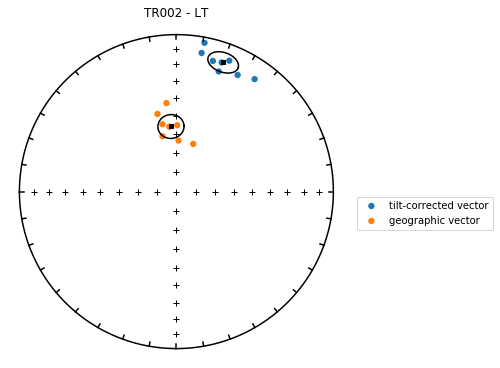

In [18]:
specimen_plot('TR002','LT')

n vectors = 5
n planes  = 3
tilt-corrected alpha95 = 11.92
geographic     alpha95 = 11.91
tilt-corrected k = 22.56
geographic     k = 22.59


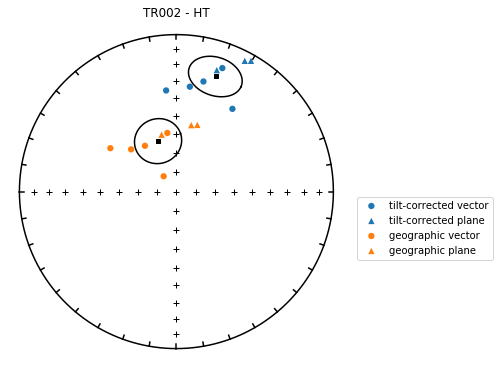

In [19]:
specimen_plot('TR002','HT','TR002.pdf')

#### TR004

n vectors = 17
n planes  = 0
tilt-corrected alpha95 = 4.51
geographic     alpha95 = 4.51
tilt-corrected k = 63.44
geographic     k = 63.44


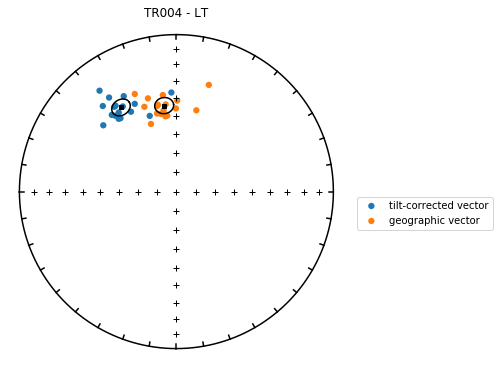

In [20]:
specimen_plot('TR004','LT')

n vectors = 12
n planes  = 3
tilt-corrected alpha95 = 57.24
geographic     alpha95 = 57.23
tilt-corrected k = 1.42
geographic     k = 1.42


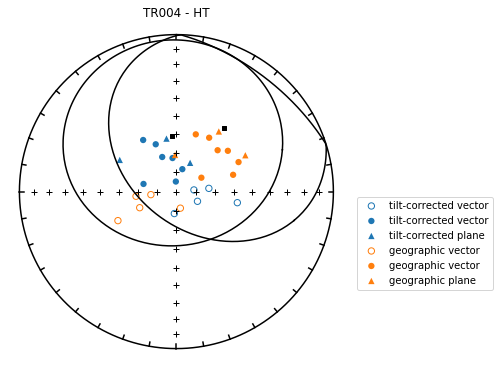

In [21]:
specimen_plot('TR004','HT')

This site has dual polarity - treat them as two different sites:

In [22]:
TR004_specimens = specimens[specimens['site']=='TR004'].copy()

TR004_tc = TR004_specimens[TR004_specimens['dir_tilt_correction']==100]
TR004_is = TR004_specimens[TR004_specimens['dir_tilt_correction']==0]

TR004_tc_HT = TR004_tc[TR004_tc['dir_comp']=='HT']
TR004_is_HT = TR004_is[TR004_is['dir_comp']=='HT']

TR004_tc_HT_dec_vec = TR004_tc_HT[TR004_tc_HT['dir_bfv_dec'].isnull()]['dir_dec'].tolist()
TR004_tc_HT_inc_vec = TR004_tc_HT[TR004_tc_HT['dir_bfv_dec'].isnull()]['dir_inc'].tolist()

TR004_is_HT_dec_vec = TR004_is_HT[TR004_is_HT['dir_bfv_dec'].isnull()]['dir_dec'].tolist()
TR004_is_HT_inc_vec = TR004_is_HT[TR004_is_HT['dir_bfv_dec'].isnull()]['dir_inc'].tolist()

TR004_tc_HT_dec_bfv = TR004_tc_HT[~TR004_tc_HT['dir_bfv_dec'].isnull()]['dir_bfv_dec'].tolist()
TR004_tc_HT_inc_bfv = TR004_tc_HT[~TR004_tc_HT['dir_bfv_dec'].isnull()]['dir_bfv_inc'].tolist()

TR004_is_HT_dec_bfv = TR004_is_HT[~TR004_is_HT['dir_bfv_dec'].isnull()]['dir_bfv_dec'].tolist()
TR004_is_HT_inc_bfv = TR004_is_HT[~TR004_is_HT['dir_bfv_dec'].isnull()]['dir_bfv_inc'].tolist()

TR004_tc_HT_dec = TR004_tc_HT_dec_vec + TR004_tc_HT_dec_bfv
TR004_tc_HT_inc = TR004_tc_HT_inc_vec + TR004_tc_HT_inc_bfv

TR004_is_HT_dec = TR004_is_HT_dec_vec + TR004_is_HT_dec_bfv
TR004_is_HT_inc = TR004_is_HT_inc_vec + TR004_is_HT_inc_bfv

TR004a_tc_HT_dec = []
TR004a_tc_HT_inc = []
TR004a_is_HT_dec = []
TR004a_is_HT_inc = []

TR004b_tc_HT_dec = []
TR004b_tc_HT_inc = []
TR004b_is_HT_dec = []
TR004b_is_HT_inc = []

for i in range(len(TR004_tc_HT_dec)):
    if TR004_tc_HT_inc[i] > 0:
        TR004a_tc_HT_dec.append(TR004_tc_HT_dec[i])
        TR004a_tc_HT_inc.append(TR004_tc_HT_inc[i])
        TR004a_is_HT_dec.append(TR004_is_HT_dec[i])
        TR004a_is_HT_inc.append(TR004_is_HT_inc[i])
    else:
        TR004b_tc_HT_dec.append(TR004_tc_HT_dec[i])
        TR004b_tc_HT_inc.append(TR004_tc_HT_inc[i])
        TR004b_is_HT_dec.append(TR004_is_HT_dec[i])
        TR004b_is_HT_inc.append(TR004_is_HT_inc[i])


TR004a_tc_HT_mean = ipmag.fisher_mean(TR004a_tc_HT_dec, TR004a_tc_HT_inc)
TR004a_is_HT_mean = ipmag.fisher_mean(TR004a_is_HT_dec, TR004a_is_HT_inc)

TR004b_tc_HT_mean = ipmag.fisher_mean(TR004b_tc_HT_dec, TR004b_tc_HT_inc)
TR004b_is_HT_mean = ipmag.fisher_mean(TR004b_is_HT_dec, TR004b_is_HT_inc)

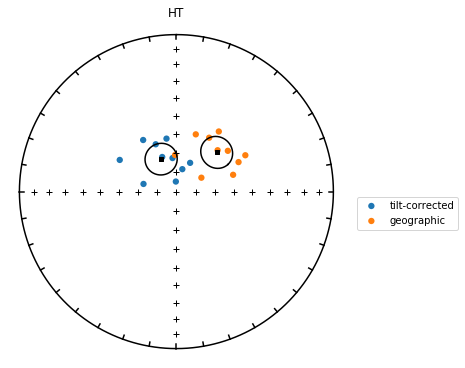

In [23]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)

ipmag.plot_di(TR004a_tc_HT_dec, TR004a_tc_HT_inc,
              color='C0', marker='o', markersize=40, label='tilt-corrected')
ipmag.plot_di(TR004a_is_HT_dec, TR004a_is_HT_inc,
              color='C1', marker='o', markersize=40, label='geographic')

ipmag.plot_di_mean(TR004a_tc_HT_mean['dec'], TR004a_tc_HT_mean['inc'], TR004a_tc_HT_mean['alpha95'],
                   color='k', marker='s')
ipmag.plot_di_mean(TR004a_is_HT_mean['dec'], TR004a_is_HT_mean['inc'], TR004a_is_HT_mean['alpha95'],
                   color='k', marker='s')

plt.title('HT')
plt.legend(loc='middle left', bbox_to_anchor=(1.02,0.5))
plt.savefig('Output/TR004_1.pdf')
plt.show()

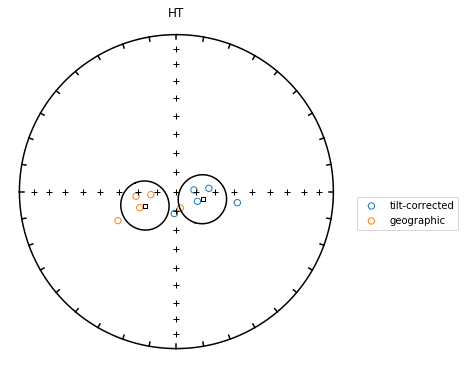

In [24]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)

ipmag.plot_di(TR004b_tc_HT_dec, TR004b_tc_HT_inc,
              color='C0', marker='o', markersize=40, label='tilt-corrected')
ipmag.plot_di(TR004b_is_HT_dec, TR004b_is_HT_inc,
              color='C1', marker='o', markersize=40, label='geographic')

ipmag.plot_di_mean(TR004b_tc_HT_mean['dec'], TR004b_tc_HT_mean['inc'], TR004b_tc_HT_mean['alpha95'],
                   color='k', marker='s')
ipmag.plot_di_mean(TR004b_is_HT_mean['dec'], TR004b_is_HT_mean['inc'], TR004b_is_HT_mean['alpha95'],
                   color='k', marker='s')

plt.title('HT')
plt.legend(loc='middle left', bbox_to_anchor=(1.02,0.5))
plt.savefig('Output/TR004_2.pdf')
plt.show()

#### TR006

n vectors = 15
n planes  = 0
tilt-corrected alpha95 = 4.95
geographic     alpha95 = 4.96
tilt-corrected k = 60.57
geographic     k = 60.39


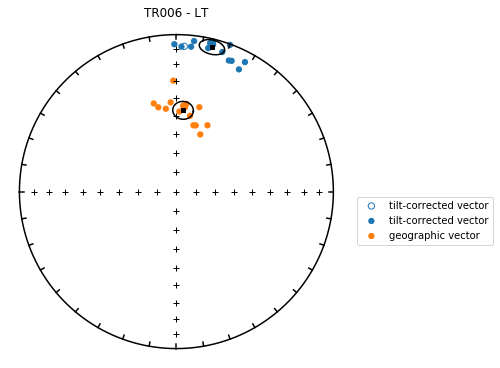

In [25]:
specimen_plot('TR006','LT')

n vectors = 19
n planes  = 2
tilt-corrected alpha95 = 24.06
geographic     alpha95 = 24.06
tilt-corrected k = 2.72
geographic     k = 2.72


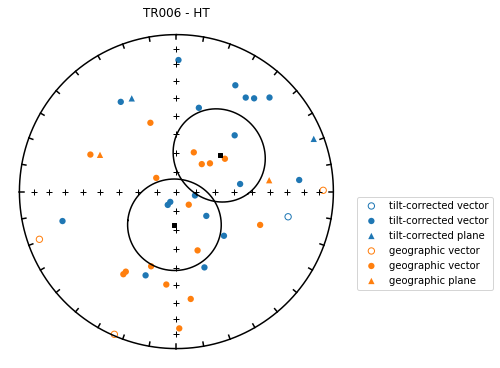

In [26]:
specimen_plot('TR006','HT','TR006.pdf')

#### TR008

n vectors = 13
n planes  = 0
tilt-corrected alpha95 = 5.67
geographic     alpha95 = 5.67
tilt-corrected k = 54.37
geographic     k = 54.35


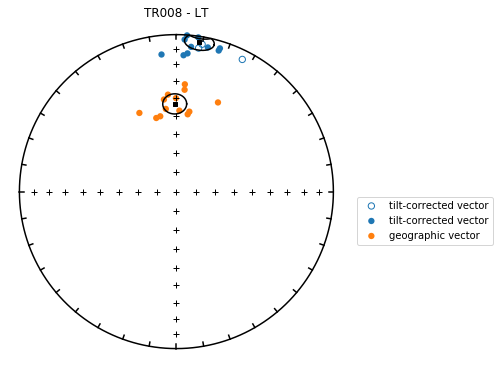

In [27]:
specimen_plot('TR008','LT')

n vectors = 6
n planes  = 0
tilt-corrected alpha95 = 78.47
geographic     alpha95 = 78.52
tilt-corrected k = 1.69
geographic     k = 1.69


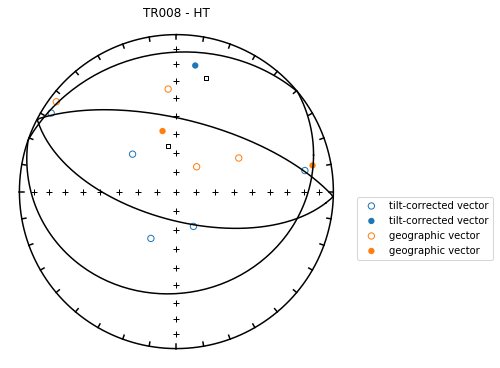

In [28]:
specimen_plot('TR008','HT','TR008.pdf')

#### TR010

n vectors = 8
n planes  = 0
tilt-corrected alpha95 = 7.79
geographic     alpha95 = 7.80
tilt-corrected k = 51.48
geographic     k = 51.34


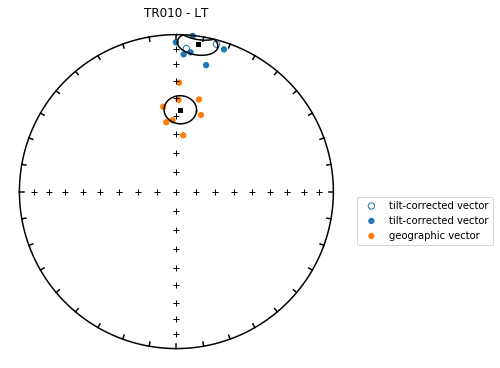

In [29]:
specimen_plot('TR010','LT')

n vectors = 12
n planes  = 0
tilt-corrected alpha95 = 32.79
geographic     alpha95 = 32.80
tilt-corrected k = 2.72
geographic     k = 2.72


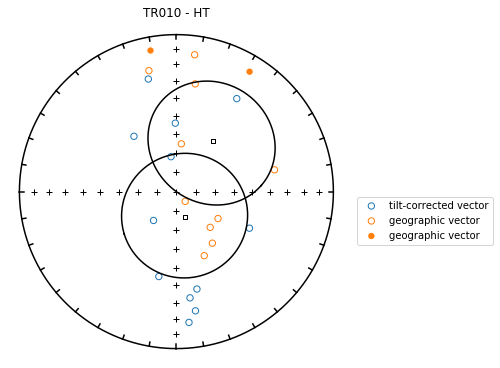

In [30]:
specimen_plot('TR010','HT','TR010.pdf')

#### TR012

n vectors = 10
n planes  = 0
tilt-corrected alpha95 = 17.99
geographic     alpha95 = 17.99
tilt-corrected k = 8.17
geographic     k = 8.17


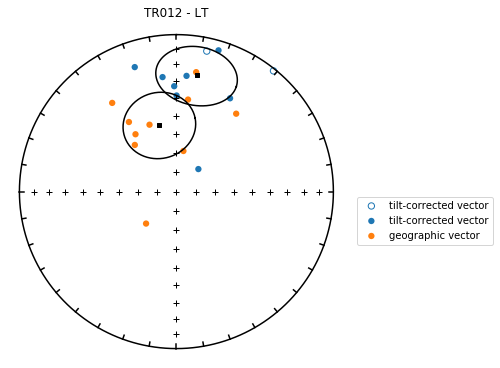

In [31]:
specimen_plot('TR012','LT')

n vectors = 15
n planes  = 0
tilt-corrected alpha95 = 38.28
geographic     alpha95 = 38.28
tilt-corrected k = 1.97
geographic     k = 1.97


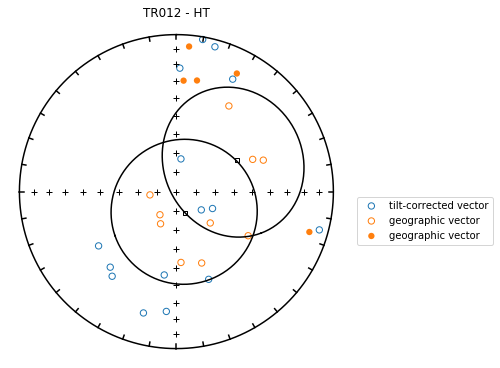

In [32]:
specimen_plot('TR012','HT','TR012.pdf')

#### TR014

n vectors = 12
n planes  = 0
tilt-corrected alpha95 = 4.62
geographic     alpha95 = 4.63
tilt-corrected k = 89.33
geographic     k = 89.02


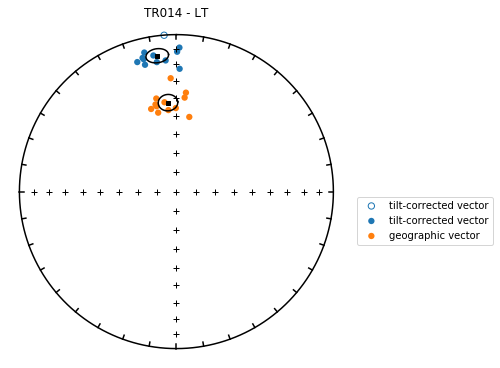

In [33]:
specimen_plot('TR014','LT')

n vectors = 12
n planes  = 0
tilt-corrected alpha95 = 12.09
geographic     alpha95 = 12.10
tilt-corrected k = 13.86
geographic     k = 13.83


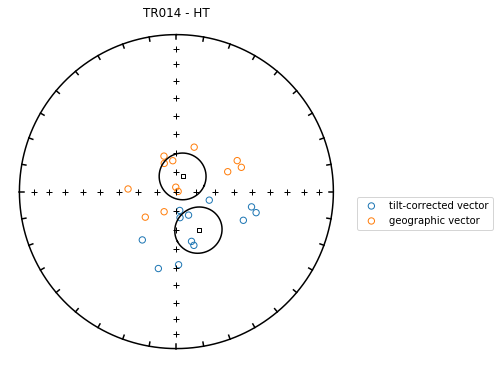

In [34]:
specimen_plot('TR014','HT','TR014.pdf')

#### TR018

n vectors = 16
n planes  = 0
tilt-corrected alpha95 = 3.35
geographic     alpha95 = 3.36
tilt-corrected k = 122.04
geographic     k = 121.65


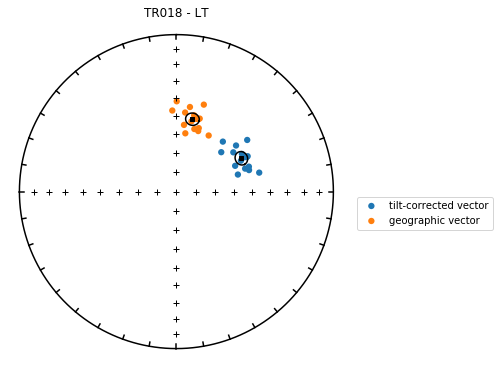

In [35]:
specimen_plot('TR018','LT')

n vectors = 8
n planes  = 6
tilt-corrected alpha95 = 12.21
geographic     alpha95 = 12.20
tilt-corrected k = 11.56
geographic     k = 11.58


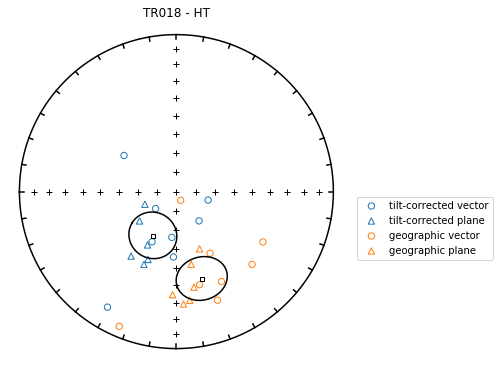

In [36]:
specimen_plot('TR018','HT','TR018.pdf')

#### TR020

n vectors = 10
n planes  = 0
tilt-corrected alpha95 = 6.08
geographic     alpha95 = 6.07
tilt-corrected k = 64.07
geographic     k = 64.24


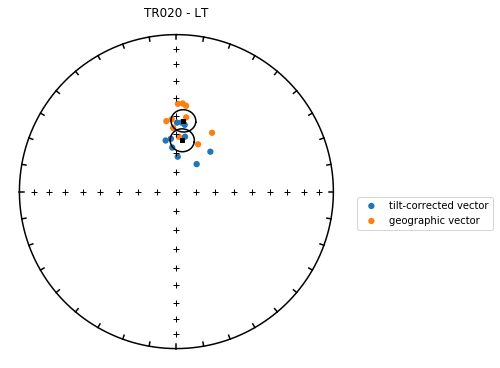

In [37]:
specimen_plot('TR020','LT')

n vectors = 9
n planes  = 1
tilt-corrected alpha95 = 10.87
geographic     alpha95 = 10.87
tilt-corrected k = 20.71
geographic     k = 20.71


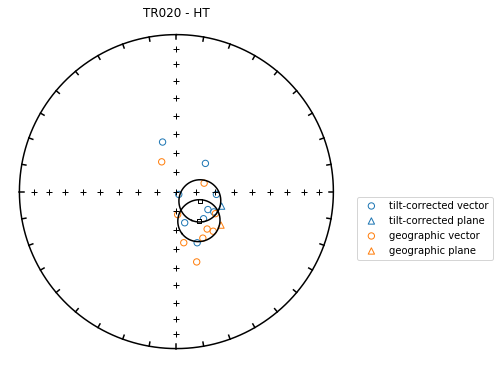

In [38]:
specimen_plot('TR020','HT','TR020.pdf')

LT alpha95 = 6.07
HT alpha95 = 10.87


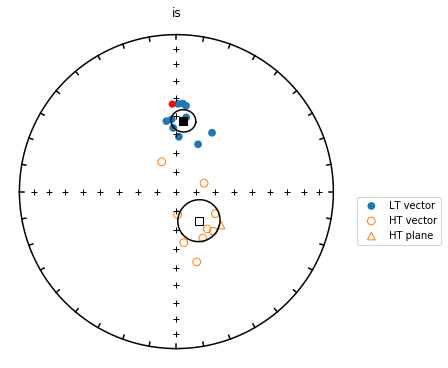

In [39]:
specimen_plot_coordinate('TR020','is',plf=True,savestring='TR020_geographic.pdf',
                         markersize=60, meanmarkersize=60)

LT alpha95 = 6.08
HT alpha95 = 10.87


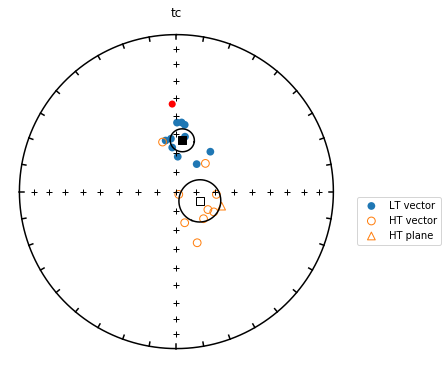

In [40]:
specimen_plot_coordinate('TR020','tc',plf=True,savestring='TR020_tilt_corrected.pdf',
                         markersize=60, meanmarkersize=60)

#### TR022

n vectors = 10
n planes  = 0
tilt-corrected alpha95 = 4.57
geographic     alpha95 = 4.56
tilt-corrected k = 112.50
geographic     k = 112.98


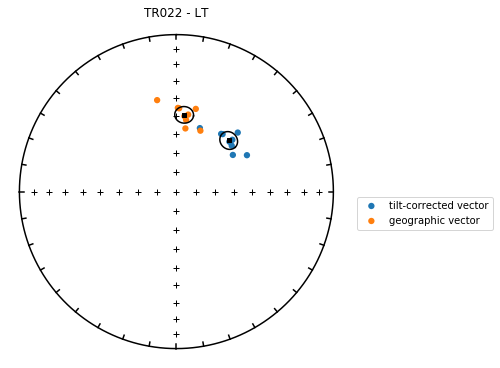

In [41]:
specimen_plot('TR022','LT')

n vectors = 6
n planes  = 1
tilt-corrected alpha95 = 42.45
geographic     alpha95 = 42.45
tilt-corrected k = 2.97
geographic     k = 2.97


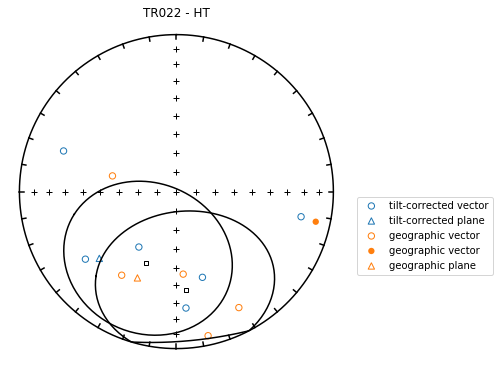

In [42]:
specimen_plot('TR022','HT','TR022.pdf')

#### TR024

n vectors = 9
n planes  = 0
tilt-corrected alpha95 = 7.00
geographic     alpha95 = 7.01
tilt-corrected k = 55.06
geographic     k = 54.85


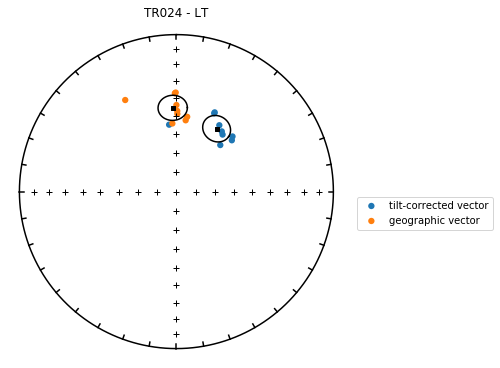

In [43]:
specimen_plot('TR024','LT')

n vectors = 9
n planes  = 0
tilt-corrected alpha95 = 18.22
geographic     alpha95 = 18.22
tilt-corrected k = 8.94
geographic     k = 8.94


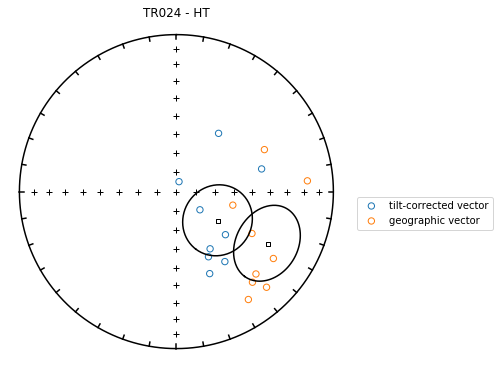

In [44]:
specimen_plot('TR024','HT','TR024.pdf')

#### TR026

n vectors = 9
n planes  = 0
tilt-corrected alpha95 = 7.36
geographic     alpha95 = 7.37
tilt-corrected k = 49.84
geographic     k = 49.78


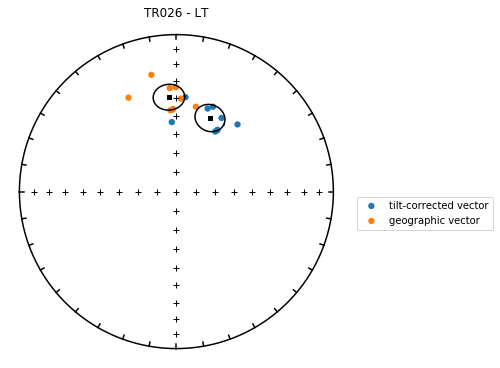

In [45]:
specimen_plot('TR026','LT')

n vectors = 9
n planes  = 0
tilt-corrected alpha95 = 15.97
geographic     alpha95 = 15.95
tilt-corrected k = 11.35
geographic     k = 11.37


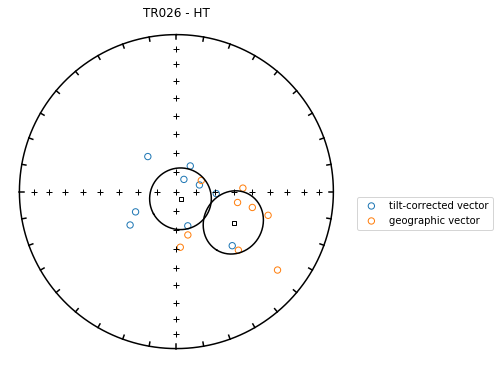

In [46]:
specimen_plot('TR026','HT','TR026.pdf')

#### TR035

n vectors = 27
n planes  = 0
tilt-corrected alpha95 = 3.97
geographic     alpha95 = 3.88
tilt-corrected k = 49.93
geographic     k = 52.20


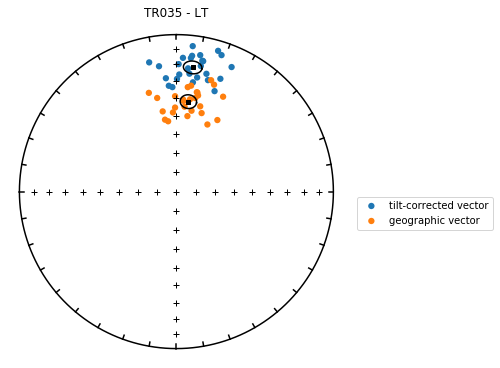

In [47]:
specimen_plot('TR035','LT')

n vectors = 17
n planes  = 2
tilt-corrected alpha95 = 14.42
geographic     alpha95 = 14.65
tilt-corrected k = 6.39
geographic     k = 6.22


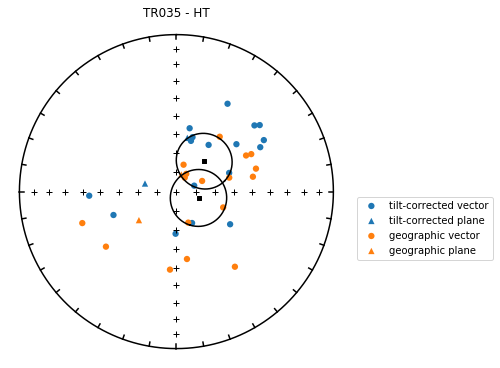

In [48]:
specimen_plot('TR035','HT','TR035.pdf')

#### TR036

n vectors = 10
n planes  = 0
tilt-corrected alpha95 = 9.19
geographic     alpha95 = 9.18
tilt-corrected k = 28.62
geographic     k = 28.68


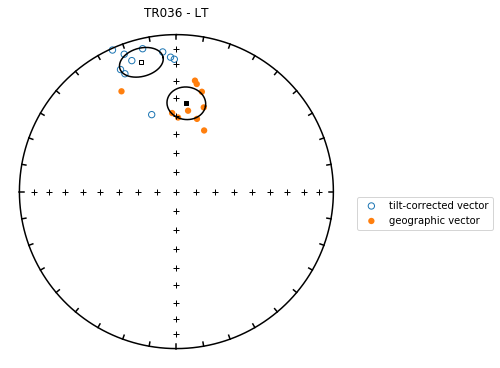

In [49]:
specimen_plot('TR036','LT')

n vectors = 2
n planes  = 2
tilt-corrected alpha95 = 53.89
geographic     alpha95 = 53.86
tilt-corrected k = 3.88
geographic     k = 3.88


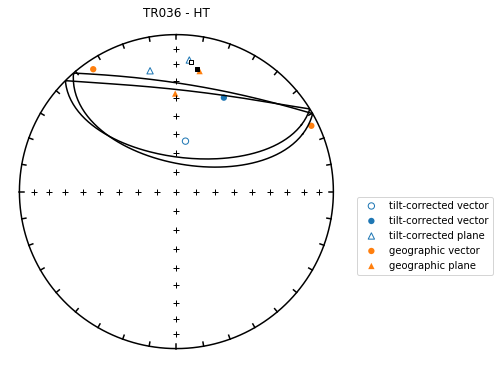

In [50]:
specimen_plot('TR036','HT','TR036.pdf')

#### TR042

n vectors = 1
n planes  = 0


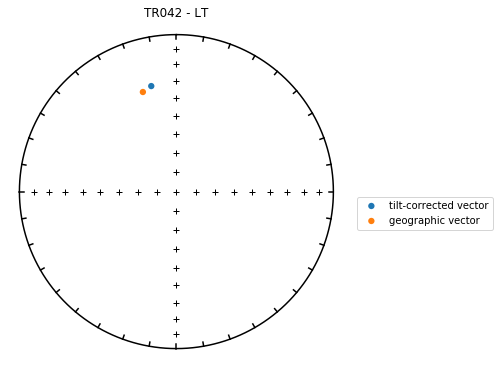

In [51]:
specimen_plot('TR042','LT')

n vectors = 14
n planes  = 0
tilt-corrected alpha95 = 11.69
geographic     alpha95 = 11.70
tilt-corrected k = 12.52
geographic     k = 12.51


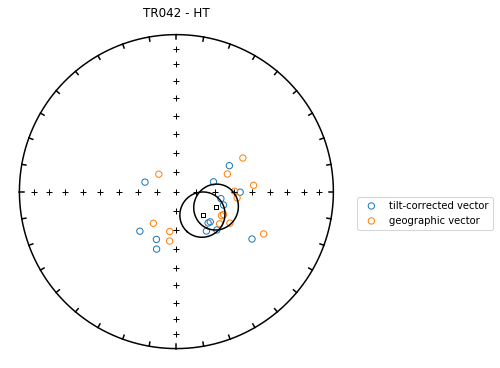

In [52]:
specimen_plot('TR042','HT','TR042.pdf')

#### TR045

n vectors = 9
n planes  = 0
tilt-corrected alpha95 = 10.57
geographic     alpha95 = 10.59
tilt-corrected k = 24.66
geographic     k = 24.61


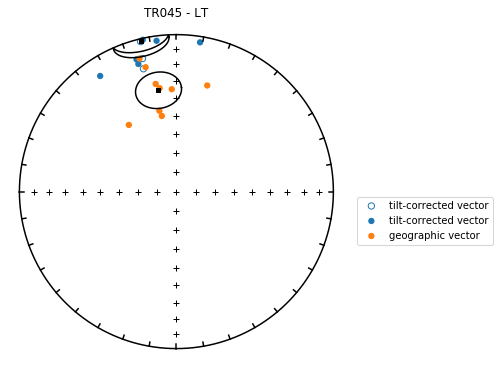

In [53]:
specimen_plot('TR045','LT')

n vectors = 9
n planes  = 4
tilt-corrected alpha95 = 30.67
geographic     alpha95 = 30.67
tilt-corrected k = 2.79
geographic     k = 2.79


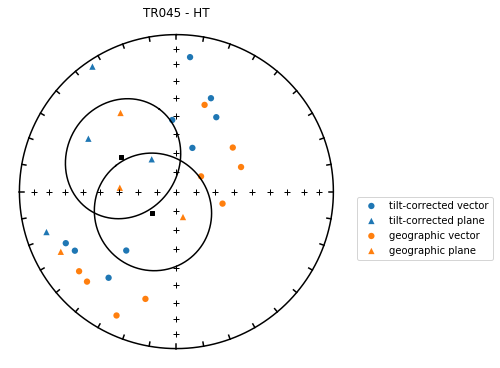

In [54]:
specimen_plot('TR045','HT','TR045.pdf')

#### TR016

n vectors = 6
n planes  = 0
tilt-corrected alpha95 = 9.63
geographic     alpha95 = 9.66
tilt-corrected k = 49.40
geographic     k = 49.03


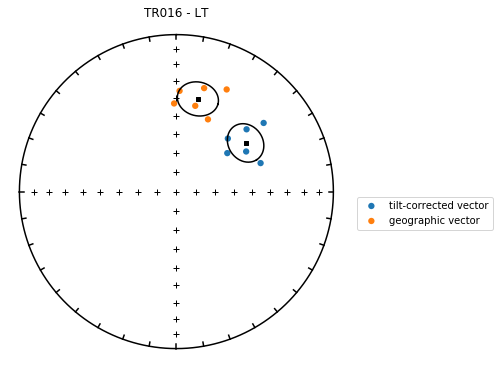

In [55]:
specimen_plot('TR016','LT')

n vectors = 7
n planes  = 0
tilt-corrected alpha95 = 23.39
geographic     alpha95 = 23.40
tilt-corrected k = 7.61
geographic     k = 7.60


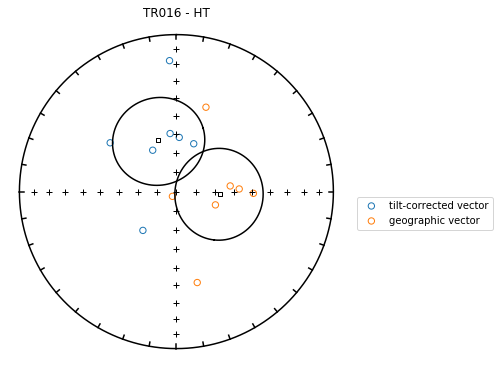

In [56]:
specimen_plot('TR016','HT','TR016.pdf')

#### TR028

n vectors = 8
n planes  = 0
tilt-corrected alpha95 = 10.77
geographic     alpha95 = 10.77
tilt-corrected k = 27.40
geographic     k = 27.40


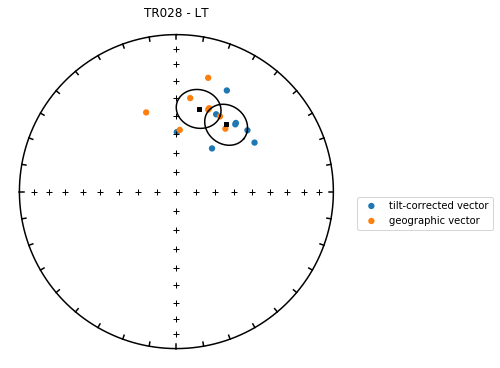

In [57]:
specimen_plot('TR028','LT')

n vectors = 4
n planes  = 1
tilt-corrected alpha95 = 12.98
geographic     alpha95 = 13.00
tilt-corrected k = 35.69
geographic     k = 35.59


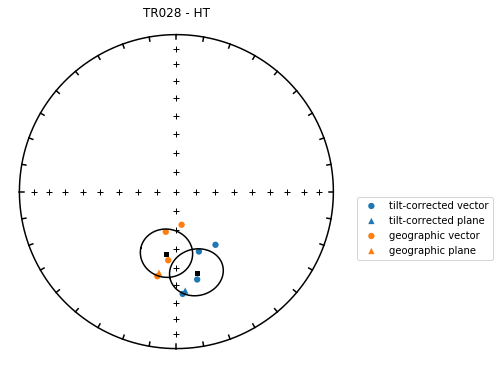

In [58]:
specimen_plot('TR028','HT','TR028.pdf')

#### TR030

n vectors = 16
n planes  = 0
tilt-corrected alpha95 = 5.63
geographic     alpha95 = 5.63
tilt-corrected k = 43.90
geographic     k = 43.93


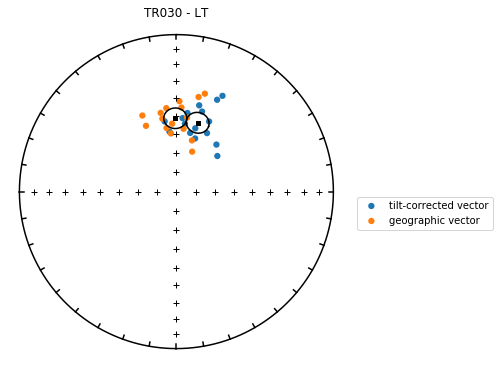

In [59]:
specimen_plot('TR030','LT')

n vectors = 4
n planes  = 0
tilt-corrected alpha95 = 34.40
geographic     alpha95 = 34.38
tilt-corrected k = 8.10
geographic     k = 8.11


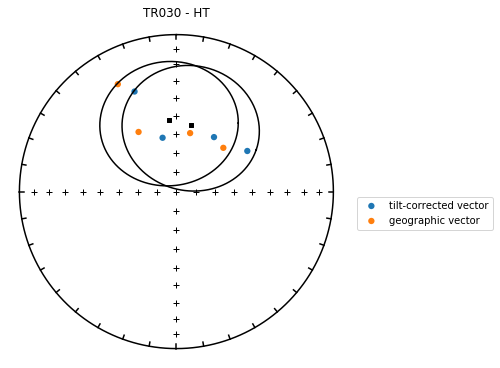

In [60]:
specimen_plot('TR030','HT','TR030.pdf')

#### TR032

n vectors = 14
n planes  = 0
tilt-corrected alpha95 = 6.30
geographic     alpha95 = 6.31
tilt-corrected k = 40.72
geographic     k = 40.67


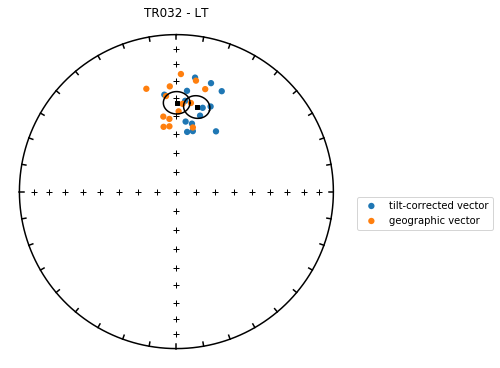

In [61]:
specimen_plot('TR032','LT')

n vectors = 3
n planes  = 3
tilt-corrected alpha95 = 18.35
geographic     alpha95 = 18.34
tilt-corrected k = 14.28
geographic     k = 14.29


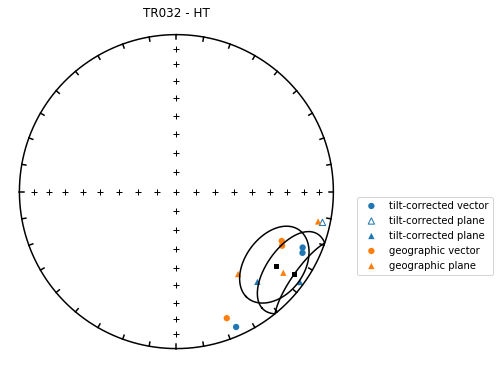

In [62]:
specimen_plot('TR032','HT','TR032.pdf')

#### TR038

n vectors = 25
n planes  = 0
tilt-corrected alpha95 = 3.16
geographic     alpha95 = 3.12
tilt-corrected k = 84.64
geographic     k = 87.02


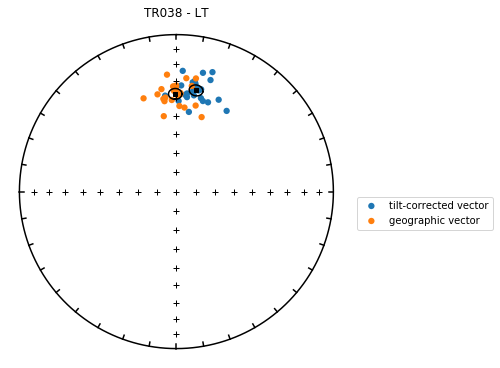

In [63]:
specimen_plot('TR038','LT')

n vectors = 15
n planes  = 4
tilt-corrected alpha95 = 23.80
geographic     alpha95 = 23.66
tilt-corrected k = 2.97
geographic     k = 2.99


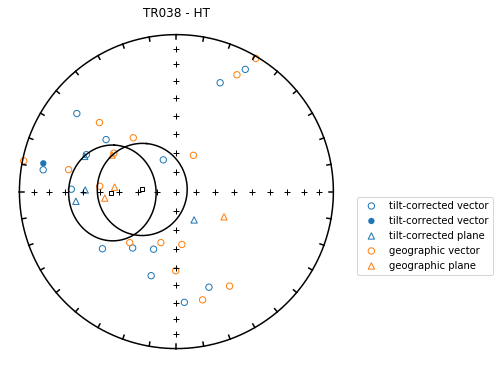

In [64]:
specimen_plot('TR038','HT','TR038.pdf')

#### TR040

n vectors = 13
n planes  = 0
tilt-corrected alpha95 = 18.15
geographic     alpha95 = 18.15
tilt-corrected k = 6.18
geographic     k = 6.18


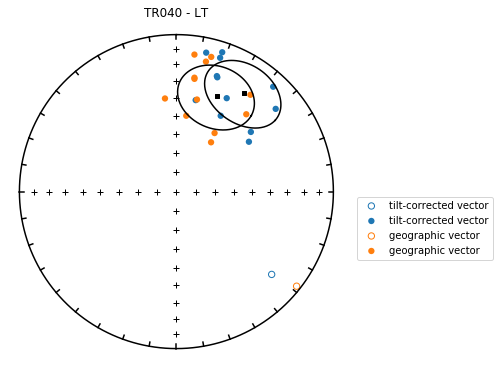

In [65]:
specimen_plot('TR040','LT')

n vectors = 14
n planes  = 0
tilt-corrected alpha95 = 36.36
geographic     alpha95 = 36.36
tilt-corrected k = 2.16
geographic     k = 2.16


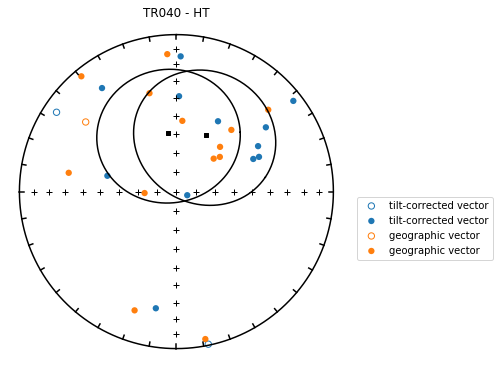

In [66]:
specimen_plot('TR040','HT','TR040.pdf')

### Beijing

In [67]:
# some sites are erroneously recorded - get rid of them
sitesBJ.dropna(subset=['samples'], inplace=True)
sitesBJ.reset_index(drop=True, inplace=True)
sitesBJ['site'].unique()

array(['16tr001', '16tr003', '16tr007', '16tr009', '16tr011', '16tr013',
       '16tr015', '16tr017', '16tr019', '16tr021', '16tr023', '16tr025',
       '16tr027', '16tr029', '16tr031', '16tr033', '16tr034', '16tr037',
       '16tr039', '16tr041', '16tr043', '16tr044'], dtype=object)

#### TR001

old bed dip direction = [44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2]
old bed dip           = [52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2]

new bed dip direction = 46.90
new bed dip           = 52.20

n vectors = 3
n planes  = 0
tilt-corrected alpha95 = 21.26
geographic     alpha95 = 21.26
tilt-corrected k = 34.69
geographic     k = 34.69


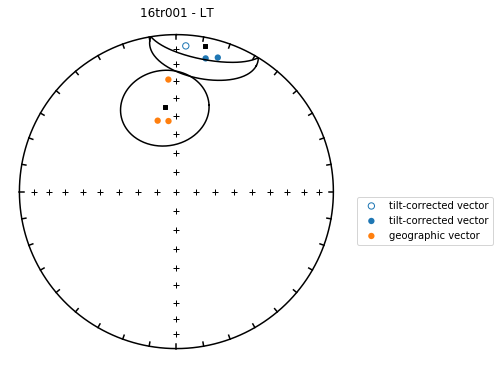

In [68]:
BJ_specimen_plot('16tr001', 'LT', 316.9, 52.2)

old bed dip direction = [44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2]
old bed dip           = [52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2]

new bed dip direction = 46.90
new bed dip           = 52.20

n vectors = 7
n planes  = 0
tilt-corrected alpha95 = 9.01
geographic     alpha95 = 9.01
tilt-corrected k = 45.80
geographic     k = 45.80


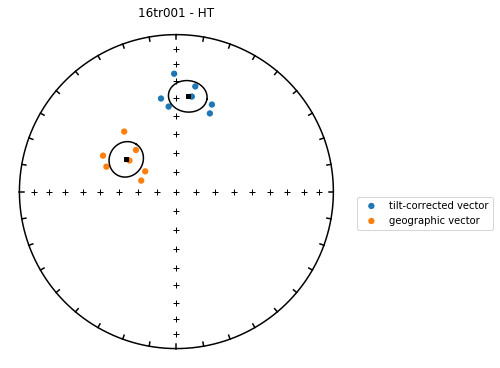

In [69]:
BJ_specimen_plot('16tr001', 'HT', 316.9, 52.2, 'TR001.pdf')

#### TR003

old bed dip direction = [50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1]
old bed dip           = [52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2]

new bed dip direction = 52.80
new bed dip           = 52.20

n vectors = 10
n planes  = 0
tilt-corrected alpha95 = 7.46
geographic     alpha95 = 7.46
tilt-corrected k = 42.92
geographic     k = 42.92


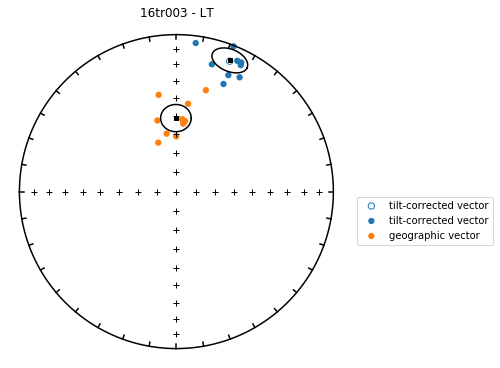

In [70]:
BJ_specimen_plot('16tr003', 'LT', 322.8, 52.2)

old bed dip direction = [50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1, 50.1]
old bed dip           = [52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2]

new bed dip direction = 52.80
new bed dip           = 52.20

n vectors = 8
n planes  = 0
tilt-corrected alpha95 = 46.19
geographic     alpha95 = 46.19
tilt-corrected k = 2.39
geographic     k = 2.39


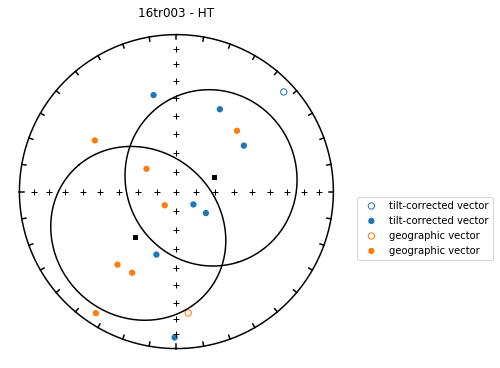

In [71]:
BJ_specimen_plot('16tr003', 'HT', 322.8, 52.2, 'TR003.pdf')

#### TR007

No handles with labels found to put in legend.


old bed dip direction = [29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9]
old bed dip           = [44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3]

new bed dip direction = 32.60
new bed dip           = 44.30

n vectors = 0
n planes  = 0


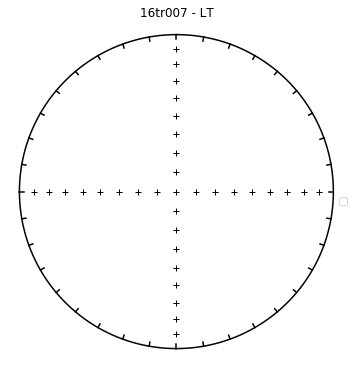

In [72]:
BJ_specimen_plot('16tr007', 'LT', 302.6, 44.3)

old bed dip direction = [29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9]
old bed dip           = [44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3]

new bed dip direction = 32.60
new bed dip           = 44.30

n vectors = 13
n planes  = 0
tilt-corrected alpha95 = 8.87
geographic     alpha95 = 8.87
tilt-corrected k = 22.81
geographic     k = 22.81


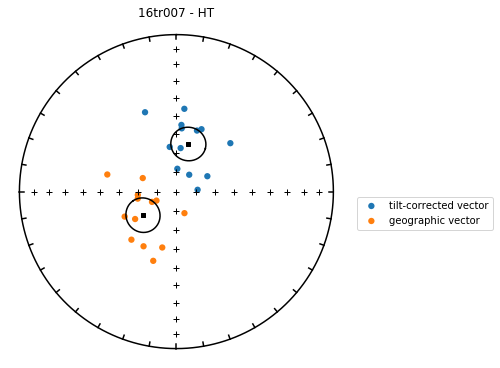

In [73]:
BJ_specimen_plot('16tr007', 'HT', 302.6, 44.3, 'TR007.pdf')

#### TR009

old bed dip direction = [29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9]
old bed dip           = [44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3]

new bed dip direction = 32.60
new bed dip           = 44.30

n vectors = 13
n planes  = 0
tilt-corrected alpha95 = 4.57
geographic     alpha95 = 4.57
tilt-corrected k = 83.14
geographic     k = 83.14


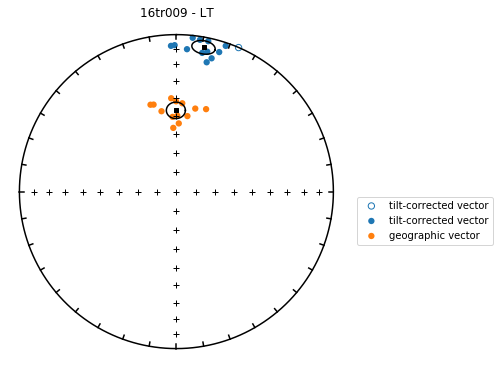

In [74]:
BJ_specimen_plot('16tr009', 'LT', 302.6, 44.3)

old bed dip direction = [29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9]
old bed dip           = [44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3]

new bed dip direction = 32.60
new bed dip           = 44.30

n vectors = 4
n planes  = 0
tilt-corrected alpha95 = 32.67
geographic     alpha95 = 32.67
tilt-corrected k = 8.88
geographic     k = 8.88


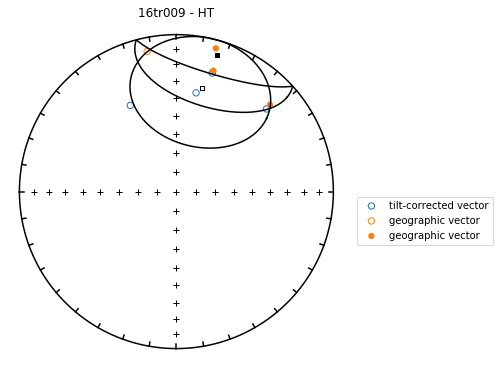

In [75]:
BJ_specimen_plot('16tr009', 'HT', 302.6, 44.3, 'TR009.pdf')

#### TR011

old bed dip direction = [17.3, 17.3, 17.3, 17.3, 17.3, 17.3, 17.3, 17.3, 17.3, 17.3, 17.3, 17.3, 17.3, 17.3, 17.3, 17.3, 17.3, 17.3, 17.3, 17.3, 17.3, 17.3]
old bed dip           = [42.5, 42.5, 42.5, 42.5, 42.5, 42.5, 42.5, 42.5, 42.5, 42.5, 42.5, 42.5, 42.5, 42.5, 42.5, 42.5, 42.5, 42.5, 42.5, 42.5, 42.5, 42.5]

new bed dip direction = 20.00
new bed dip           = 42.50

n vectors = 2
n planes  = 0
tilt-corrected alpha95 = 12.21
geographic     alpha95 = 12.21
tilt-corrected k = 420.78
geographic     k = 420.78


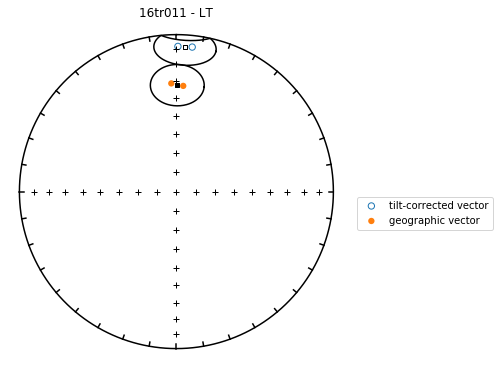

In [76]:
BJ_specimen_plot('16tr011', 'LT', 290, 42.5)

old bed dip direction = [17.3, 17.3, 17.3, 17.3, 17.3, 17.3, 17.3, 17.3, 17.3, 17.3, 17.3, 17.3, 17.3, 17.3, 17.3, 17.3, 17.3, 17.3, 17.3, 17.3, 17.3, 17.3]
old bed dip           = [42.5, 42.5, 42.5, 42.5, 42.5, 42.5, 42.5, 42.5, 42.5, 42.5, 42.5, 42.5, 42.5, 42.5, 42.5, 42.5, 42.5, 42.5, 42.5, 42.5, 42.5, 42.5]

new bed dip direction = 20.00
new bed dip           = 42.50

n vectors = 7
n planes  = 0
tilt-corrected alpha95 = 79.10
geographic     alpha95 = 79.10
tilt-corrected k = 1.54
geographic     k = 1.54


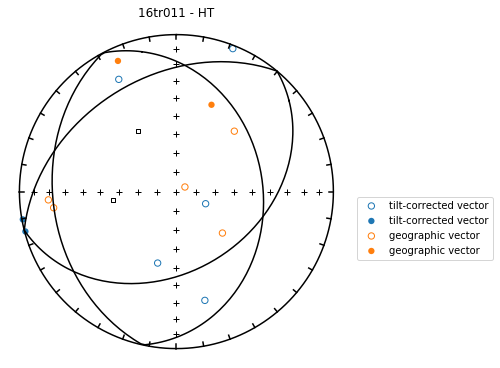

In [77]:
BJ_specimen_plot('16tr011', 'HT', 290, 42.5, 'TR011.pdf')

#### TR013

old bed dip direction = [18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8]
old bed dip           = [23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7]

new bed dip direction = 21.50
new bed dip           = 23.70

n vectors = 7
n planes  = 0
tilt-corrected alpha95 = 11.46
geographic     alpha95 = 11.46
tilt-corrected k = 28.71
geographic     k = 28.71


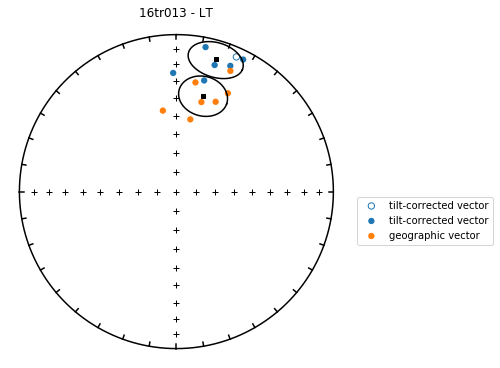

In [78]:
BJ_specimen_plot('16tr013', 'LT', 291.5, 23.7)

No handles with labels found to put in legend.


old bed dip direction = [18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8]
old bed dip           = [23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7, 23.7]

new bed dip direction = 21.50
new bed dip           = 23.70

n vectors = 0
n planes  = 0


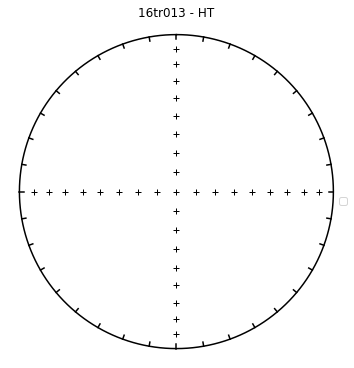

In [79]:
BJ_specimen_plot('16tr013', 'HT', 291.5, 23.7, 'TR013.pdf')

#### TR015

old bed dip direction = [341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1]
old bed dip           = [29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3]

new bed dip direction = 343.80
new bed dip           = 29.30

n vectors = 10
n planes  = 0
tilt-corrected alpha95 = 7.97
geographic     alpha95 = 7.97
tilt-corrected k = 37.67
geographic     k = 37.67


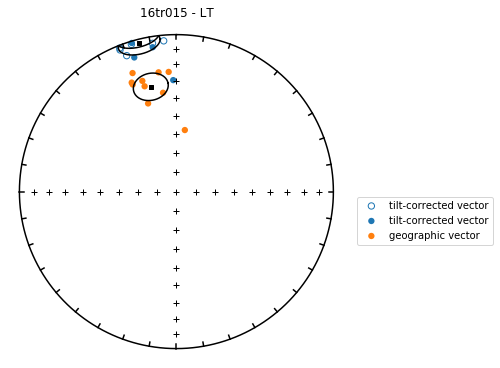

In [80]:
BJ_specimen_plot('16tr015', 'LT', 253.8, 29.3)

old bed dip direction = [341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1]
old bed dip           = [29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3]

new bed dip direction = 343.80
new bed dip           = 29.30

n vectors = 10
n planes  = 0
tilt-corrected alpha95 = 11.50
geographic     alpha95 = 11.50
tilt-corrected k = 18.61
geographic     k = 18.61


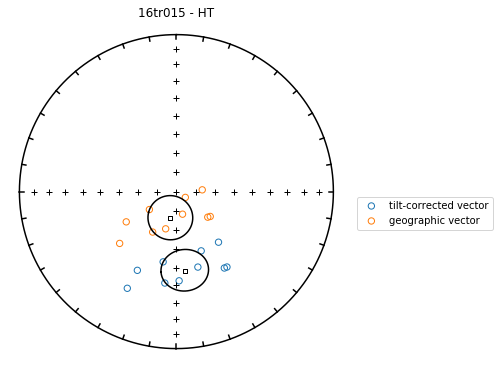

In [81]:
BJ_specimen_plot('16tr015', 'HT', 253.8, 29.3, 'TR015.pdf')

#### TR017

old bed dip direction = [123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0]
old bed dip           = [37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7]

new bed dip direction = 125.70
new bed dip           = 37.70

n vectors = 3
n planes  = 0
tilt-corrected alpha95 = 8.36
geographic     alpha95 = 8.36
tilt-corrected k = 218.76
geographic     k = 218.76


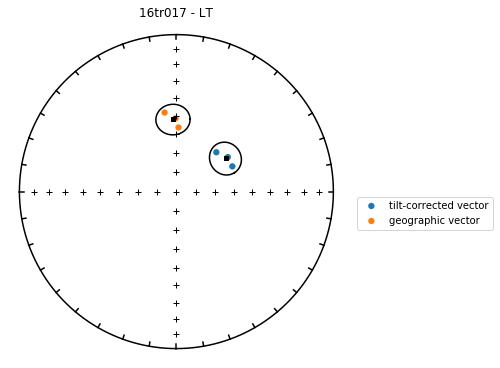

In [82]:
BJ_specimen_plot('16tr017', 'LT', 35.7, 37.7)

old bed dip direction = [123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0, 123.0]
old bed dip           = [37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7]

new bed dip direction = 125.70
new bed dip           = 37.70

n vectors = 10
n planes  = 0
tilt-corrected alpha95 = 89.60
geographic     alpha95 = 89.60
tilt-corrected k = 1.26
geographic     k = 1.26


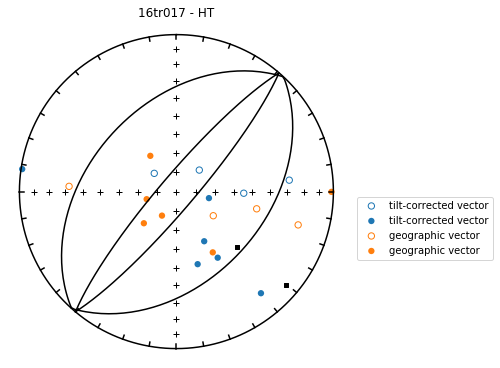

In [83]:
BJ_specimen_plot('16tr017', 'HT', 35.7, 37.7, 'TR017.pdf')

#### TR019

old bed dip direction = [125.8, 125.8, 125.8, 125.8, 125.8, 125.8, 125.8, 125.8, 125.8, 125.8, 125.8, 125.8, 125.8, 125.8, 125.8, 125.8, 125.8, 125.8, 125.8, 125.8]
old bed dip           = [37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7]

new bed dip direction = 128.50
new bed dip           = 37.70

n vectors = 10
n planes  = 0
tilt-corrected alpha95 = 4.65
geographic     alpha95 = 4.65
tilt-corrected k = 108.73
geographic     k = 108.73


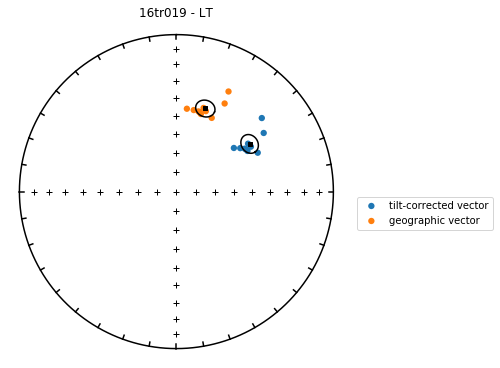

In [84]:
BJ_specimen_plot('16tr019', 'LT', 38.5, 37.7)

No handles with labels found to put in legend.


old bed dip direction = [125.8, 125.8, 125.8, 125.8, 125.8, 125.8, 125.8, 125.8, 125.8, 125.8, 125.8, 125.8, 125.8, 125.8, 125.8, 125.8, 125.8, 125.8, 125.8, 125.8]
old bed dip           = [37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7]

new bed dip direction = 128.50
new bed dip           = 37.70

n vectors = 0
n planes  = 0


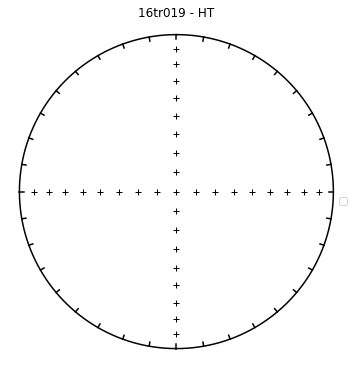

In [85]:
BJ_specimen_plot('16tr019', 'HT', 38.5, 37.7, 'TR019.pdf')

#### TR021

old bed dip direction = [116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7]
old bed dip           = [31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6]

new bed dip direction = 119.40
new bed dip           = 31.60

n vectors = 11
n planes  = 0
tilt-corrected alpha95 = 5.27
geographic     alpha95 = 5.27
tilt-corrected k = 76.14
geographic     k = 76.14


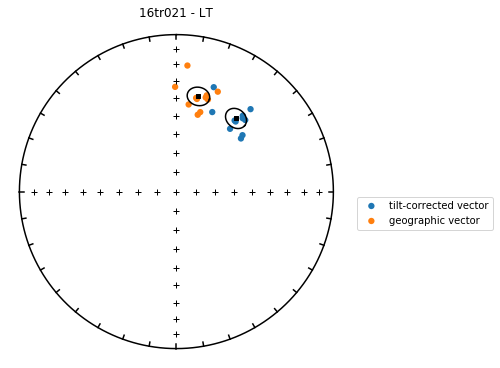

In [86]:
BJ_specimen_plot('16tr021', 'LT', 29.4, 31.6)

old bed dip direction = [116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7]
old bed dip           = [31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6]

new bed dip direction = 119.40
new bed dip           = 31.60

n vectors = 5
n planes  = 4
tilt-corrected alpha95 = 16.99
geographic     alpha95 = 16.99
tilt-corrected k = 10.14
geographic     k = 10.14


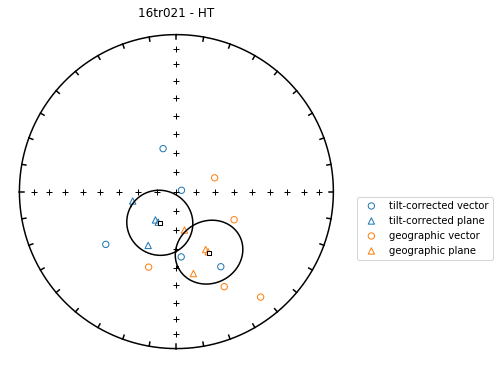

In [87]:
BJ_specimen_plot('16tr021', 'HT', 29.4, 31.6, 'TR021.pdf')

#### TR023

old bed dip direction = [115.1, 115.1, 115.1, 115.1, 115.1, 115.1, 115.1, 115.1, 115.1, 115.1, 115.1, 115.1, 115.1, 115.1, 115.1, 115.1, 115.1, 115.1]
old bed dip           = [25.8, 25.8, 25.8, 25.8, 25.8, 25.8, 25.8, 25.8, 25.8, 25.8, 25.8, 25.8, 25.8, 25.8, 25.8, 25.8, 25.8, 25.8]

new bed dip direction = 117.80
new bed dip           = 25.80

n vectors = 8
n planes  = 0
tilt-corrected alpha95 = 7.53
geographic     alpha95 = 7.53
tilt-corrected k = 55.07
geographic     k = 55.07


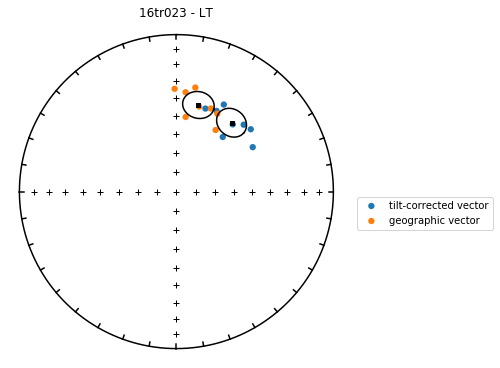

In [88]:
BJ_specimen_plot('16tr023', 'LT', 27.8, 25.8)

old bed dip direction = [115.1, 115.1, 115.1, 115.1, 115.1, 115.1, 115.1, 115.1, 115.1, 115.1, 115.1, 115.1, 115.1, 115.1, 115.1, 115.1, 115.1, 115.1]
old bed dip           = [25.8, 25.8, 25.8, 25.8, 25.8, 25.8, 25.8, 25.8, 25.8, 25.8, 25.8, 25.8, 25.8, 25.8, 25.8, 25.8, 25.8, 25.8]

new bed dip direction = 117.80
new bed dip           = 25.80

n vectors = 2
n planes  = 0
tilt-corrected alpha95 = 180.00
geographic     alpha95 = 180.00
tilt-corrected k = 0.96
geographic     k = 0.96


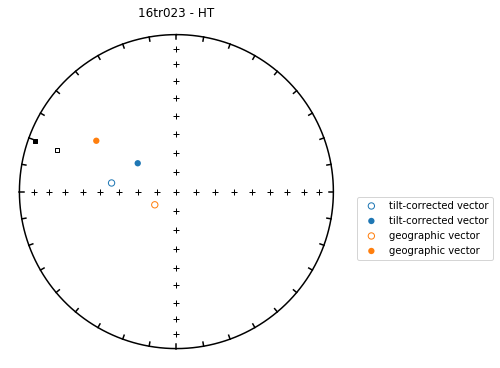

In [89]:
BJ_specimen_plot('16tr023', 'HT', 27.8, 25.8, 'TR023.pdf')

#### TR025

old bed dip direction = [111.2, 111.2, 111.2, 111.2, 111.2, 111.2, 111.2, 111.2, 111.2, 111.2, 111.2, 111.2, 111.2, 111.2, 111.2, 111.2, 111.2, 111.2, 111.2, 111.2, 111.2, 111.2]
old bed dip           = [30.7, 30.7, 30.7, 30.7, 30.7, 30.7, 30.7, 30.7, 30.7, 30.7, 30.7, 30.7, 30.7, 30.7, 30.7, 30.7, 30.7, 30.7, 30.7, 30.7, 30.7, 30.7]

new bed dip direction = 113.90
new bed dip           = 30.70

n vectors = 11
n planes  = 0
tilt-corrected alpha95 = 7.76
geographic     alpha95 = 7.76
tilt-corrected k = 35.60
geographic     k = 35.60


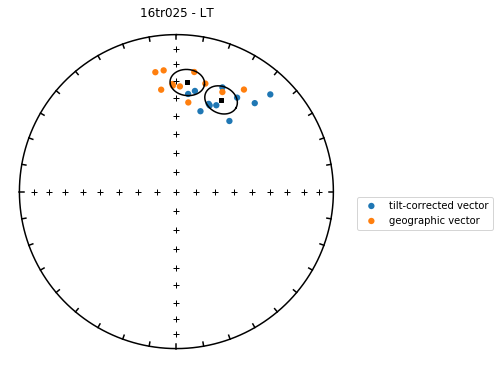

In [90]:
BJ_specimen_plot('16tr025', 'LT', 23.9, 30.7)

old bed dip direction = [111.2, 111.2, 111.2, 111.2, 111.2, 111.2, 111.2, 111.2, 111.2, 111.2, 111.2, 111.2, 111.2, 111.2, 111.2, 111.2, 111.2, 111.2, 111.2, 111.2, 111.2, 111.2]
old bed dip           = [30.7, 30.7, 30.7, 30.7, 30.7, 30.7, 30.7, 30.7, 30.7, 30.7, 30.7, 30.7, 30.7, 30.7, 30.7, 30.7, 30.7, 30.7, 30.7, 30.7, 30.7, 30.7]

new bed dip direction = 113.90
new bed dip           = 30.70

n vectors = 9
n planes  = 0
tilt-corrected alpha95 = 27.20
geographic     alpha95 = 27.20
tilt-corrected k = 4.54
geographic     k = 4.54


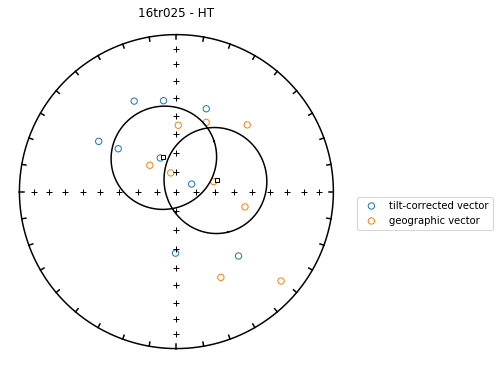

In [91]:
BJ_specimen_plot('16tr025', 'HT', 23.9, 30.7, 'TR025.pdf')

#### TR027

old bed dip direction = [123.9, 123.9, 123.9, 123.9, 123.9, 123.9, 123.9, 123.9, 123.9, 123.9, 123.9, 123.9, 123.9, 123.9, 123.9, 123.9, 123.9, 123.9, 123.9, 123.9, 123.9, 123.9]
old bed dip           = [39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4]

new bed dip direction = 126.60
new bed dip           = 39.40

n vectors = 8
n planes  = 0
tilt-corrected alpha95 = 8.68
geographic     alpha95 = 8.68
tilt-corrected k = 41.67
geographic     k = 41.67


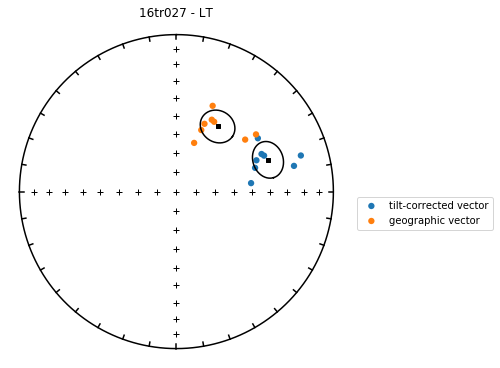

In [92]:
BJ_specimen_plot('16tr027', 'LT', 36.6, 39.4)

old bed dip direction = [123.9, 123.9, 123.9, 123.9, 123.9, 123.9, 123.9, 123.9, 123.9, 123.9, 123.9, 123.9, 123.9, 123.9, 123.9, 123.9, 123.9, 123.9, 123.9, 123.9, 123.9, 123.9]
old bed dip           = [39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4, 39.4]

new bed dip direction = 126.60
new bed dip           = 39.40

n vectors = 1
n planes  = 0


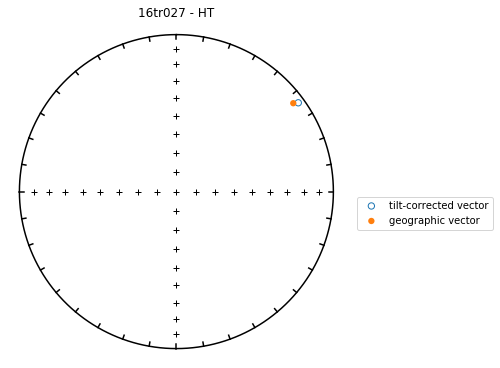

In [93]:
BJ_specimen_plot('16tr027', 'HT', 36.6, 39.4, 'TR027.pdf')

#### TR029

old bed dip direction = [119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8]
old bed dip           = [41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7]

new bed dip direction = 122.50
new bed dip           = 41.70

n vectors = 12
n planes  = 0
tilt-corrected alpha95 = 14.70
geographic     alpha95 = 14.70
tilt-corrected k = 9.68
geographic     k = 9.68


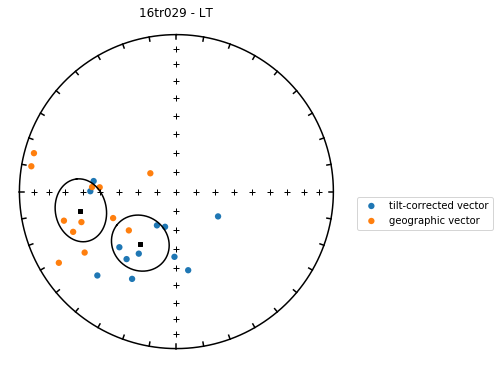

In [94]:
BJ_specimen_plot('16tr029', 'LT', 32.5, 41.7)

old bed dip direction = [119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8, 119.8]
old bed dip           = [41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7, 41.7]

new bed dip direction = 122.50
new bed dip           = 41.70

n vectors = 1
n planes  = 0


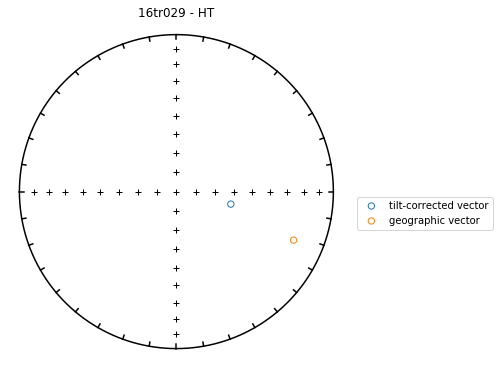

In [95]:
BJ_specimen_plot('16tr029', 'HT', 32.5, 41.7, 'TR029.pdf')

#### TR031

old bed dip direction = [98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3]
old bed dip           = [14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1]

new bed dip direction = 101.00
new bed dip           = 14.10

n vectors = 20
n planes  = 0
tilt-corrected alpha95 = 8.76
geographic     alpha95 = 8.76
tilt-corrected k = 14.85
geographic     k = 14.85


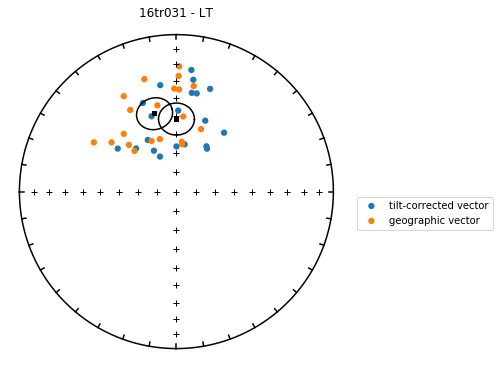

In [96]:
BJ_specimen_plot('16tr031', 'LT', 11.0, 14.1)

old bed dip direction = [98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3]
old bed dip           = [14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1]

new bed dip direction = 101.00
new bed dip           = 14.10

n vectors = 8
n planes  = 0
tilt-corrected alpha95 = 14.52
geographic     alpha95 = 14.52
tilt-corrected k = 15.51
geographic     k = 15.51


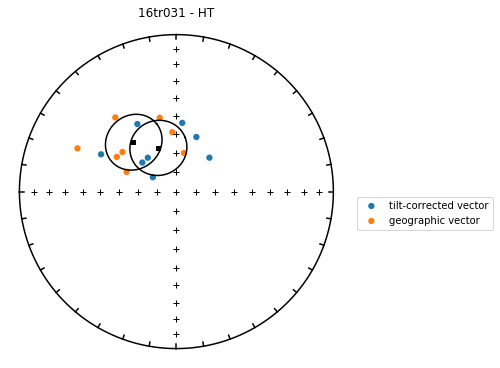

In [97]:
BJ_specimen_plot('16tr031', 'HT', 11.0, 14.1, 'TR031.pdf')

#### TR033

old bed dip direction = [98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3]
old bed dip           = [14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1]

new bed dip direction = 101.00
new bed dip           = 14.10

n vectors = 19
n planes  = 0
tilt-corrected alpha95 = 7.23
geographic     alpha95 = 7.23
tilt-corrected k = 22.55
geographic     k = 22.55


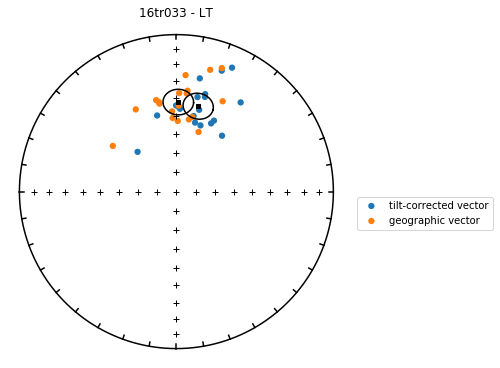

In [98]:
BJ_specimen_plot('16tr033', 'LT', 11.0, 14.1)

old bed dip direction = [98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3]
old bed dip           = [14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1]

new bed dip direction = 101.00
new bed dip           = 14.10

n vectors = 9
n planes  = 0
tilt-corrected alpha95 = 36.09
geographic     alpha95 = 36.09
tilt-corrected k = 2.99
geographic     k = 2.99


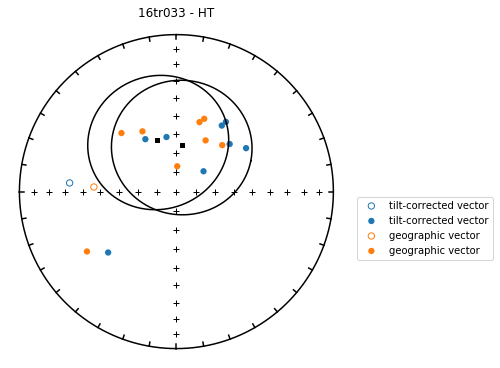

In [99]:
BJ_specimen_plot('16tr033', 'HT', 11.0, 14.1, 'TR033.pdf')

#### TR034

old bed dip direction = [180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4]
old bed dip           = [13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5]

new bed dip direction = 183.10
new bed dip           = 13.50

n vectors = 15
n planes  = 0
tilt-corrected alpha95 = 8.74
geographic     alpha95 = 8.74
tilt-corrected k = 20.12
geographic     k = 20.12


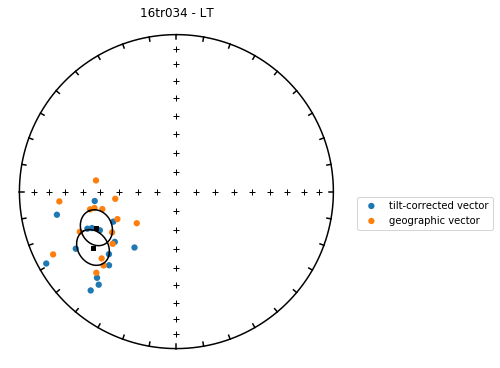

In [100]:
BJ_specimen_plot('16tr034', 'LT', 93.1, 13.5)

old bed dip direction = [180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4]
old bed dip           = [13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5]

new bed dip direction = 183.10
new bed dip           = 13.50

n vectors = 11
n planes  = 0
tilt-corrected alpha95 = 12.96
geographic     alpha95 = 12.96
tilt-corrected k = 13.38
geographic     k = 13.38


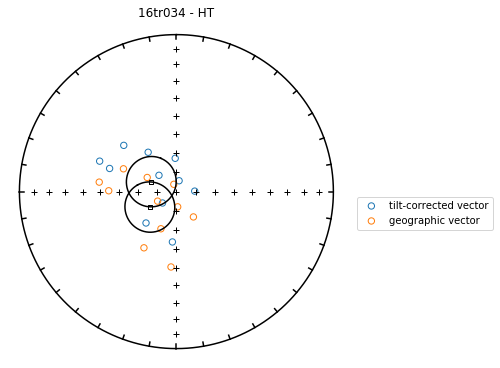

In [101]:
BJ_specimen_plot('16tr034', 'HT', 93.1, 13.5, 'TR034.pdf')

#### TR037

old bed dip direction = [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
old bed dip           = [15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7]

new bed dip direction = 102.70
new bed dip           = 15.70

n vectors = 21
n planes  = 0
tilt-corrected alpha95 = 4.06
geographic     alpha95 = 4.06
tilt-corrected k = 62.27
geographic     k = 62.27


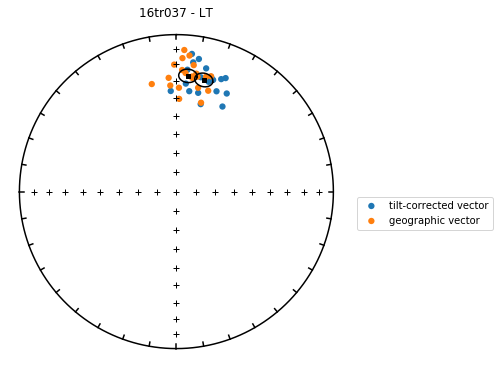

In [102]:
BJ_specimen_plot('16tr037', 'LT', 12.7, 15.7)

old bed dip direction = [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
old bed dip           = [15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7]

new bed dip direction = 102.70
new bed dip           = 15.70

n vectors = 17
n planes  = 0
tilt-corrected alpha95 = 17.25
geographic     alpha95 = 17.25
tilt-corrected k = 5.25
geographic     k = 5.25


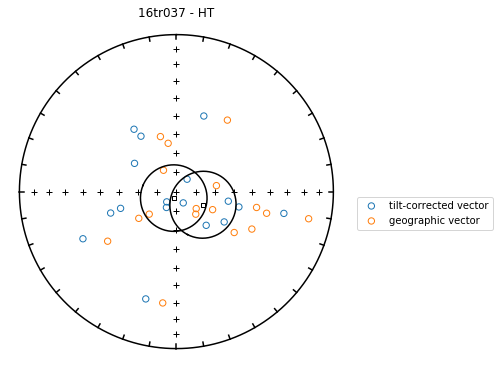

In [103]:
BJ_specimen_plot('16tr037', 'HT', 12.7, 15.7, 'TR037.pdf')

#### TR039

old bed dip direction = [79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0]
old bed dip           = [16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3]

new bed dip direction = 81.70
new bed dip           = 16.30

n vectors = 19
n planes  = 0
tilt-corrected alpha95 = 7.31
geographic     alpha95 = 7.31
tilt-corrected k = 22.07
geographic     k = 22.07


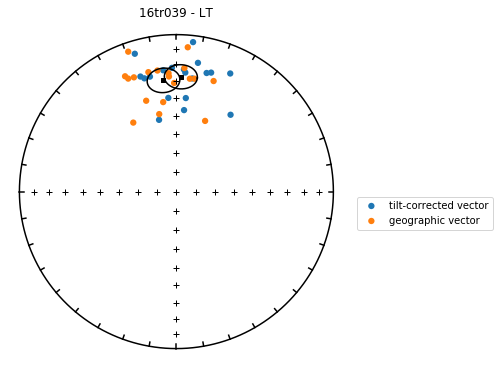

In [104]:
BJ_specimen_plot('16tr039', 'LT', 351.7, 16.3)

old bed dip direction = [79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0]
old bed dip           = [16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3]

new bed dip direction = 81.70
new bed dip           = 16.30

n vectors = 9
n planes  = 0
tilt-corrected alpha95 = 21.22
geographic     alpha95 = 21.22
tilt-corrected k = 6.85
geographic     k = 6.85


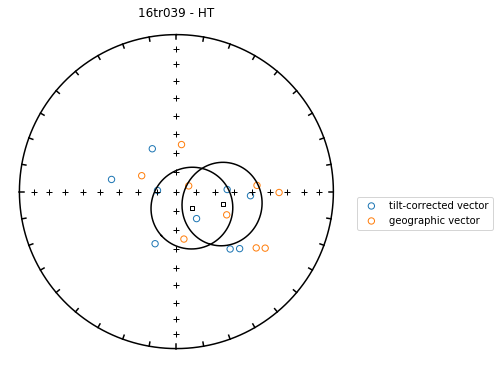

In [105]:
BJ_specimen_plot('16tr039', 'HT', 351.7, 16.3, 'TR039.pdf')

#### TR041

old bed dip direction = [65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1]
old bed dip           = [5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2]

new bed dip direction = 67.80
new bed dip           = 5.20

n vectors = 17
n planes  = 0
tilt-corrected alpha95 = 7.44
geographic     alpha95 = 7.44
tilt-corrected k = 23.95
geographic     k = 23.95


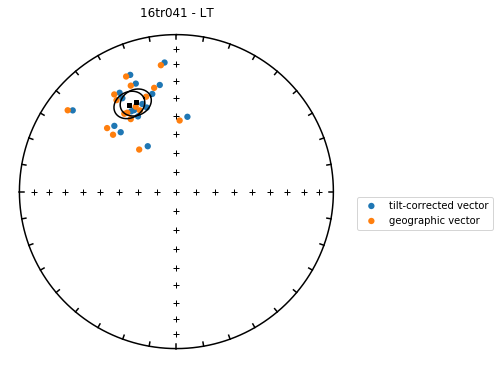

In [106]:
BJ_specimen_plot('16tr041', 'LT', 337.8, 5.2)

old bed dip direction = [65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1]
old bed dip           = [5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2]

new bed dip direction = 67.80
new bed dip           = 5.20

n vectors = 10
n planes  = 0
tilt-corrected alpha95 = 18.37
geographic     alpha95 = 18.37
tilt-corrected k = 7.87
geographic     k = 7.87


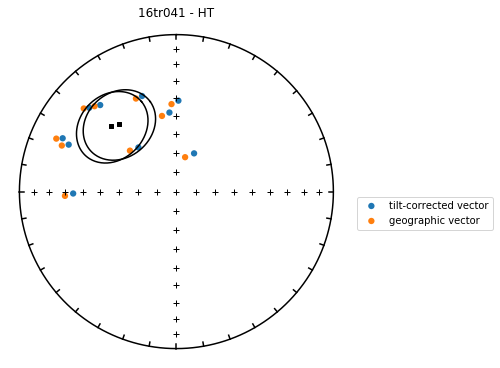

In [107]:
BJ_specimen_plot('16tr041', 'HT', 337.8, 5.2, 'TR041.pdf')

#### TR043

No handles with labels found to put in legend.


old bed dip direction = [109.9, 109.9, 109.9, 109.9, 109.9, 109.9, 109.9, 109.9, 109.9, 109.9, 109.9, 109.9, 109.9, 109.9, 109.9, 109.9, 109.9, 109.9, 109.9, 109.9]
old bed dip           = [4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4]

new bed dip direction = 112.60
new bed dip           = 4.40

n vectors = 0
n planes  = 0


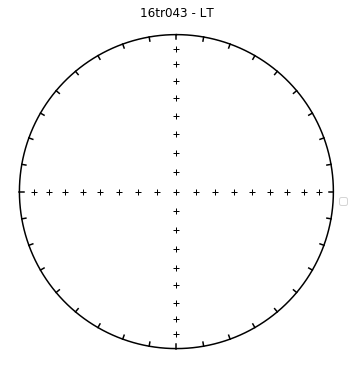

In [108]:
BJ_specimen_plot('16tr043', 'LT', 22.6, 4.4)

old bed dip direction = [109.9, 109.9, 109.9, 109.9, 109.9, 109.9, 109.9, 109.9, 109.9, 109.9, 109.9, 109.9, 109.9, 109.9, 109.9, 109.9, 109.9, 109.9, 109.9, 109.9]
old bed dip           = [4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4]

new bed dip direction = 112.60
new bed dip           = 4.40

n vectors = 8
n planes  = 0
tilt-corrected alpha95 = 24.22
geographic     alpha95 = 24.22
tilt-corrected k = 6.19
geographic     k = 6.19


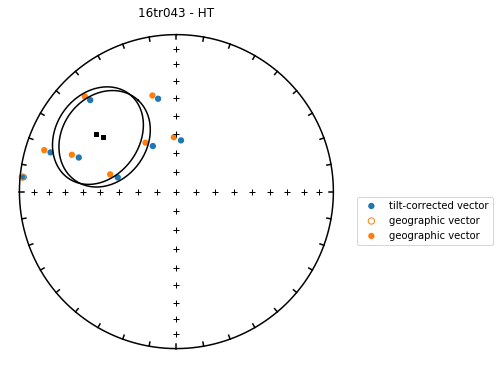

In [109]:
BJ_specimen_plot('16tr043', 'HT', 22.6, 4.4, 'TR043.pdf')

#### TR044

No handles with labels found to put in legend.


old bed dip direction = [107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0]
old bed dip           = [9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6]

new bed dip direction = 109.70
new bed dip           = 9.60

n vectors = 0
n planes  = 0


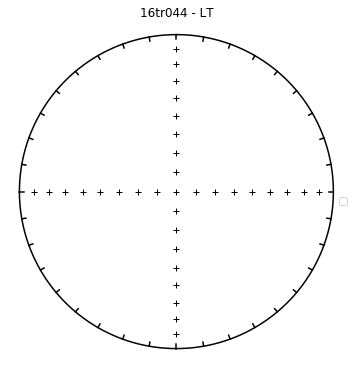

In [110]:
BJ_specimen_plot('16tr044', 'LT', 19.7, 9.6)

old bed dip direction = [107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107.0]
old bed dip           = [9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6, 9.6]

new bed dip direction = 109.70
new bed dip           = 9.60

n vectors = 10
n planes  = 0
tilt-corrected alpha95 = 32.08
geographic     alpha95 = 32.08
tilt-corrected k = 3.23
geographic     k = 3.23


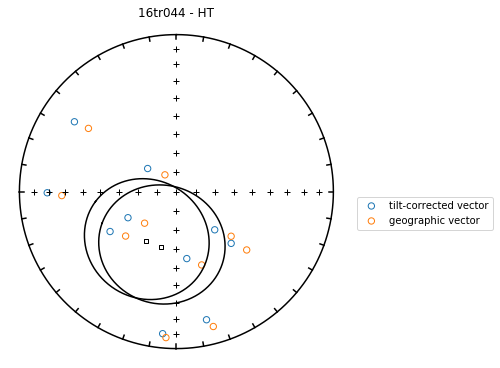

In [111]:
BJ_specimen_plot('16tr044', 'HT', 19.7, 9.6, 'TR044.pdf')

## Good Sites

### Berkeley

Get lists:

In [112]:
LT = sites[sites['dir_comp_name']=='LT'].copy()
HT = sites[sites['dir_comp_name']=='HT'].copy()

LT_tc = LT[LT['dir_tilt_correction']==100]
LT_is = LT[LT['dir_tilt_correction']==0]

HT_tc = HT[HT['dir_tilt_correction']==100]
HT_is = HT[HT['dir_tilt_correction']==0]

LT_tc_dec = LT_tc['dir_dec'].tolist()
LT_tc_inc = LT_tc['dir_inc'].tolist()
LT_tc_a95 = LT_tc['dir_alpha95'].tolist()

LT_is_dec = LT_is['dir_dec'].tolist()
LT_is_inc = LT_is['dir_inc'].tolist()
LT_is_a95 = LT_is['dir_alpha95'].tolist()

HT_tc_dec = HT_tc['dir_dec'].tolist()
HT_tc_inc = HT_tc['dir_inc'].tolist()
HT_tc_a95 = HT_tc['dir_alpha95'].tolist()

HT_is_dec = HT_is['dir_dec'].tolist()
HT_is_inc = HT_is['dir_inc'].tolist()
HT_is_a95 = HT_is['dir_alpha95'].tolist()

Filter based on $\alpha_{95}$:

In [113]:
threshold = 20

good_site_list = HT_tc[HT_tc['dir_alpha95']<threshold]['site'].unique()

print('n = {}'.format(len(good_site_list)))
print(good_site_list)

n = 9
['TR002' 'TR014' 'TR018' 'TR020' 'TR024' 'TR026' 'TR035' 'TR042' 'TR028']


Filter based on $\kappa$:

In [114]:
k_threshold = 10

k_good_site_list = HT_tc[HT_tc['dir_k']>k_threshold]['site'].unique()

print('n = {}'.format(len(k_good_site_list)))
print(k_good_site_list)

n = 6
['TR002' 'TR014' 'TR020' 'TR026' 'TR042' 'TR028']


The filtering based on $\kappa$ creates a subset of the sites identified using the $\alpha_{95}$ filtering. Visual inspection of the sites suggests that the $\alpha_{95}$ filtering selects sites that generate a robust direction, so we prefer that filtering method.

Plot the HT components of these sites again:

n vectors = 5
n planes  = 3
tilt-corrected alpha95 = 11.92
geographic     alpha95 = 11.91
tilt-corrected k = 22.56
geographic     k = 22.59


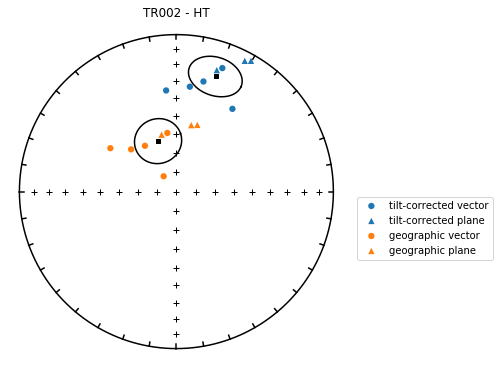

n vectors = 12
n planes  = 0
tilt-corrected alpha95 = 12.09
geographic     alpha95 = 12.10
tilt-corrected k = 13.86
geographic     k = 13.83


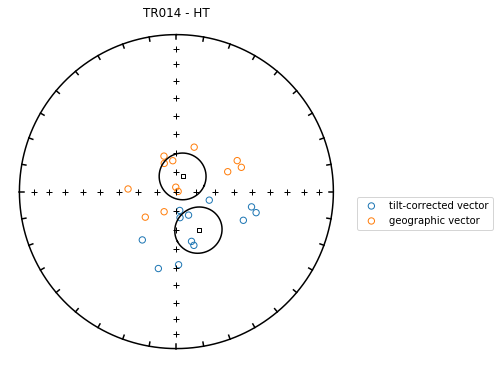

n vectors = 8
n planes  = 6
tilt-corrected alpha95 = 12.21
geographic     alpha95 = 12.20
tilt-corrected k = 11.56
geographic     k = 11.58


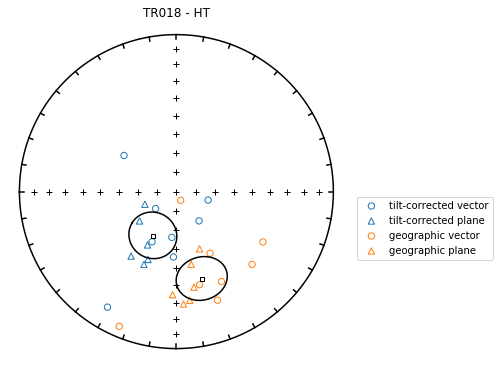

n vectors = 9
n planes  = 1
tilt-corrected alpha95 = 10.87
geographic     alpha95 = 10.87
tilt-corrected k = 20.71
geographic     k = 20.71


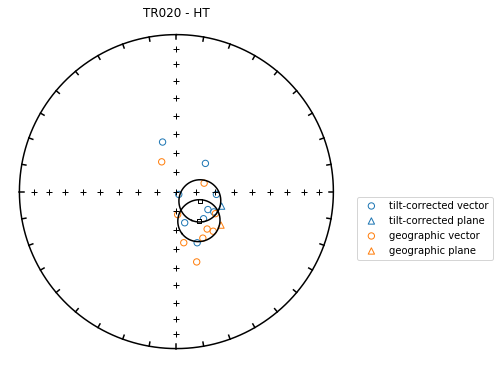

n vectors = 9
n planes  = 0
tilt-corrected alpha95 = 18.22
geographic     alpha95 = 18.22
tilt-corrected k = 8.94
geographic     k = 8.94


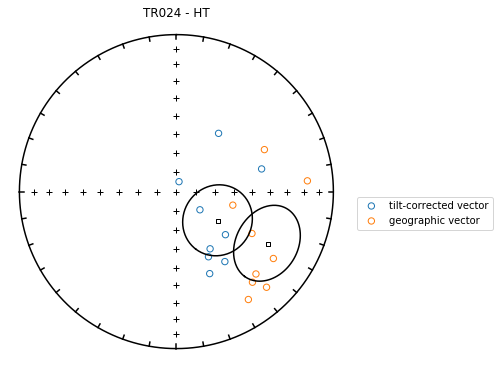

n vectors = 9
n planes  = 0
tilt-corrected alpha95 = 15.97
geographic     alpha95 = 15.95
tilt-corrected k = 11.35
geographic     k = 11.37


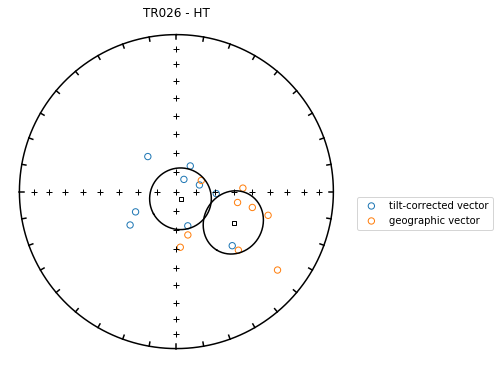

n vectors = 17
n planes  = 2
tilt-corrected alpha95 = 14.42
geographic     alpha95 = 14.65
tilt-corrected k = 6.39
geographic     k = 6.22


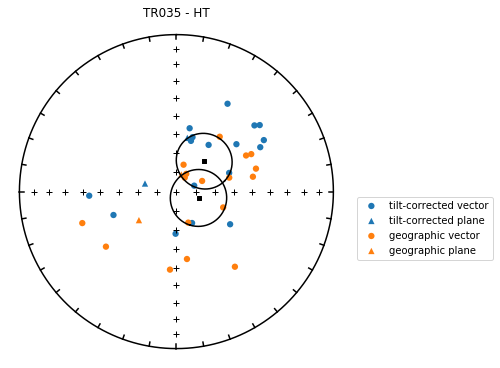

n vectors = 14
n planes  = 0
tilt-corrected alpha95 = 11.69
geographic     alpha95 = 11.70
tilt-corrected k = 12.52
geographic     k = 12.51


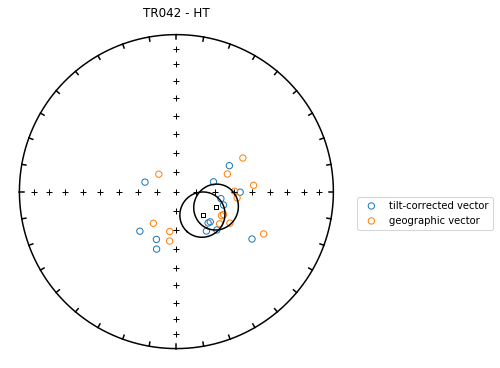

n vectors = 4
n planes  = 1
tilt-corrected alpha95 = 12.98
geographic     alpha95 = 13.00
tilt-corrected k = 35.69
geographic     k = 35.59


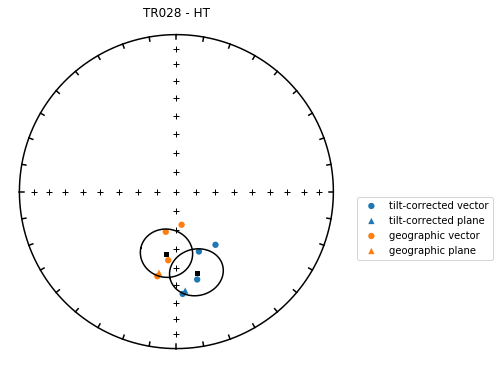

In [115]:
for i in range(len(good_site_list)):
    specimen_plot(good_site_list[i],'HT')

Geographic:

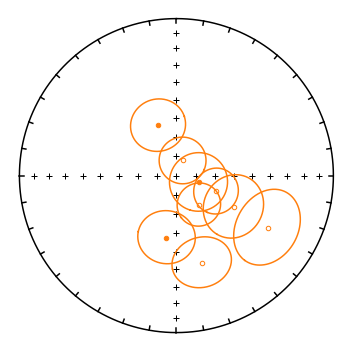

In [116]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
for i in range(len(HT_is_dec)):
    if HT_tc_a95[i]<threshold:
        ipmag.plot_di_mean(HT_is_dec[i], HT_is_inc[i], HT_is_a95[i],color='C1')
plt.show()

Tilt-corrected:

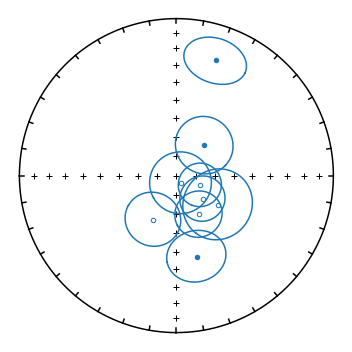

In [117]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
for i in range(len(HT_tc_dec)):
    if HT_tc_a95[i]<threshold:
        ipmag.plot_di_mean(HT_tc_dec[i], HT_tc_inc[i], HT_tc_a95[i],color='C0')
plt.show()

### Beijing

Add Beijing data manually, since we need to fix the bedding measurements:

In [118]:
BJ_HT_site = []
BJ_HT_strike = np.array([])
BJ_HT_dip = np.array([])
BJ_HT_tc_dec = np.array([])
BJ_HT_tc_inc = np.array([])
BJ_HT_tc_a95 = np.array([])
BJ_HT_is_dec = np.array([])
BJ_HT_is_inc = np.array([])
BJ_HT_is_a95 = np.array([])

old bed dip direction = [44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2]
old bed dip           = [52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2, 52.2]

new bed dip direction = 46.90
new bed dip           = 52.20

n vectors = 7
n planes  = 0
tilt-corrected alpha95 = 9.01
geographic     alpha95 = 9.01
tilt-corrected k = 45.80
geographic     k = 45.80


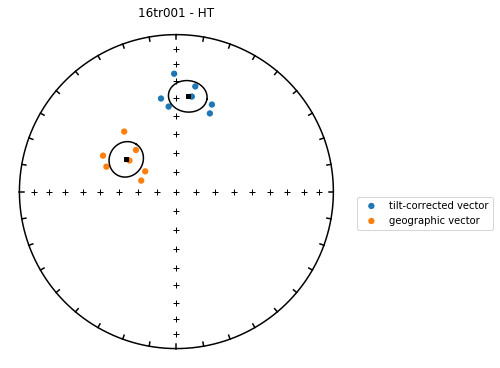

In [119]:
this_site = '16tr001'
this_strike = 316.9
this_dip = 52.2
is_mean, tc_mean = get_BJ_site_mean(this_site, 'HT', this_strike, this_dip)
BJ_HT_site.append(this_site)
BJ_HT_strike = np.append(BJ_HT_strike, this_strike)
BJ_HT_dip = np.append(BJ_HT_dip, this_dip)
BJ_HT_tc_dec = np.append(BJ_HT_tc_dec, tc_mean['dec'])
BJ_HT_tc_inc = np.append(BJ_HT_tc_inc, tc_mean['inc'])
BJ_HT_tc_a95 = np.append(BJ_HT_tc_a95, tc_mean['alpha95'])
BJ_HT_is_dec = np.append(BJ_HT_is_dec, is_mean['dec'])
BJ_HT_is_inc = np.append(BJ_HT_is_inc, is_mean['inc'])
BJ_HT_is_a95 = np.append(BJ_HT_is_a95, is_mean['alpha95'])
BJ_specimen_plot(this_site, 'HT', this_strike, this_dip)

old bed dip direction = [29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9, 29.9]
old bed dip           = [44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3, 44.3]

new bed dip direction = 32.60
new bed dip           = 44.30

n vectors = 13
n planes  = 0
tilt-corrected alpha95 = 8.87
geographic     alpha95 = 8.87
tilt-corrected k = 22.81
geographic     k = 22.81


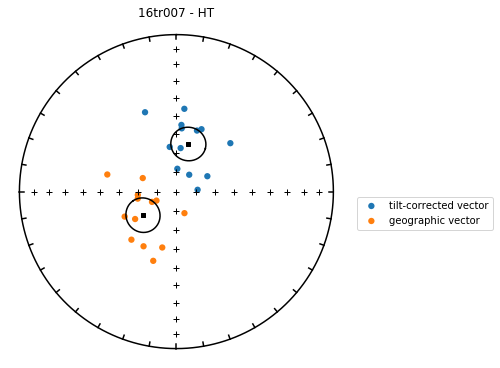

In [120]:
this_site = '16tr007'
this_strike = 302.6
this_dip = 44.3
is_mean, tc_mean = get_BJ_site_mean(this_site, 'HT', this_strike, this_dip)
BJ_HT_site.append(this_site)
BJ_HT_strike = np.append(BJ_HT_strike, this_strike)
BJ_HT_dip = np.append(BJ_HT_dip, this_dip)
BJ_HT_tc_dec = np.append(BJ_HT_tc_dec, tc_mean['dec'])
BJ_HT_tc_inc = np.append(BJ_HT_tc_inc, tc_mean['inc'])
BJ_HT_tc_a95 = np.append(BJ_HT_tc_a95, tc_mean['alpha95'])
BJ_HT_is_dec = np.append(BJ_HT_is_dec, is_mean['dec'])
BJ_HT_is_inc = np.append(BJ_HT_is_inc, is_mean['inc'])
BJ_HT_is_a95 = np.append(BJ_HT_is_a95, is_mean['alpha95'])
BJ_specimen_plot(this_site, 'HT', this_strike, this_dip)

old bed dip direction = [341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1, 341.1]
old bed dip           = [29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3, 29.3]

new bed dip direction = 343.80
new bed dip           = 29.30

n vectors = 10
n planes  = 0
tilt-corrected alpha95 = 11.50
geographic     alpha95 = 11.50
tilt-corrected k = 18.61
geographic     k = 18.61


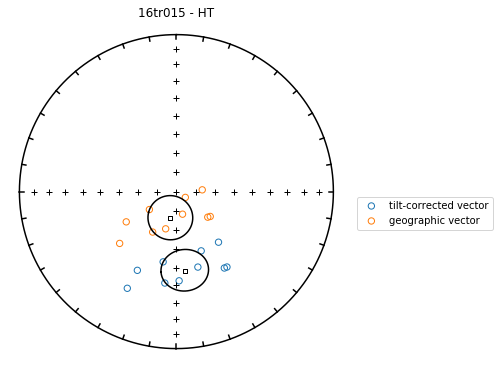

In [121]:
this_site = '16tr015'
this_strike = 253.8
this_dip = 29.3
is_mean, tc_mean = get_BJ_site_mean(this_site, 'HT', this_strike, this_dip)
BJ_HT_site.append(this_site)
BJ_HT_strike = np.append(BJ_HT_strike, this_strike)
BJ_HT_dip = np.append(BJ_HT_dip, this_dip)
BJ_HT_tc_dec = np.append(BJ_HT_tc_dec, tc_mean['dec'])
BJ_HT_tc_inc = np.append(BJ_HT_tc_inc, tc_mean['inc'])
BJ_HT_tc_a95 = np.append(BJ_HT_tc_a95, tc_mean['alpha95'])
BJ_HT_is_dec = np.append(BJ_HT_is_dec, is_mean['dec'])
BJ_HT_is_inc = np.append(BJ_HT_is_inc, is_mean['inc'])
BJ_HT_is_a95 = np.append(BJ_HT_is_a95, is_mean['alpha95'])
BJ_specimen_plot(this_site, 'HT', this_strike, this_dip)

old bed dip direction = [116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7, 116.7]
old bed dip           = [31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6, 31.6]

new bed dip direction = 119.40
new bed dip           = 31.60

n vectors = 5
n planes  = 4
tilt-corrected alpha95 = 16.99
geographic     alpha95 = 16.99
tilt-corrected k = 10.14
geographic     k = 10.14


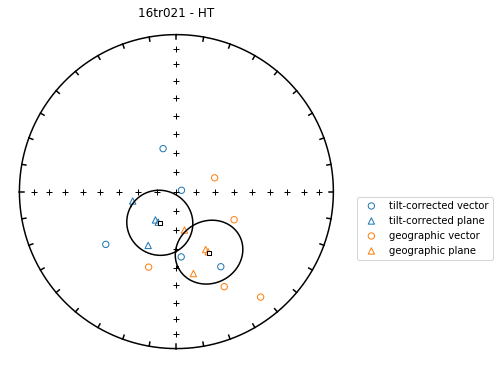

In [122]:
this_site = '16tr021'
this_strike = 29.4
this_dip = 31.6
is_mean, tc_mean = get_BJ_site_mean(this_site, 'HT', this_strike, this_dip)
BJ_HT_site.append(this_site)
BJ_HT_strike = np.append(BJ_HT_strike, this_strike)
BJ_HT_dip = np.append(BJ_HT_dip, this_dip)
BJ_HT_tc_dec = np.append(BJ_HT_tc_dec, tc_mean['dec'])
BJ_HT_tc_inc = np.append(BJ_HT_tc_inc, tc_mean['inc'])
BJ_HT_tc_a95 = np.append(BJ_HT_tc_a95, tc_mean['alpha95'])
BJ_HT_is_dec = np.append(BJ_HT_is_dec, is_mean['dec'])
BJ_HT_is_inc = np.append(BJ_HT_is_inc, is_mean['inc'])
BJ_HT_is_a95 = np.append(BJ_HT_is_a95, is_mean['alpha95'])
BJ_specimen_plot(this_site, 'HT', this_strike, this_dip)

old bed dip direction = [98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3, 98.3]
old bed dip           = [14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1]

new bed dip direction = 101.00
new bed dip           = 14.10

n vectors = 8
n planes  = 0
tilt-corrected alpha95 = 14.52
geographic     alpha95 = 14.52
tilt-corrected k = 15.51
geographic     k = 15.51


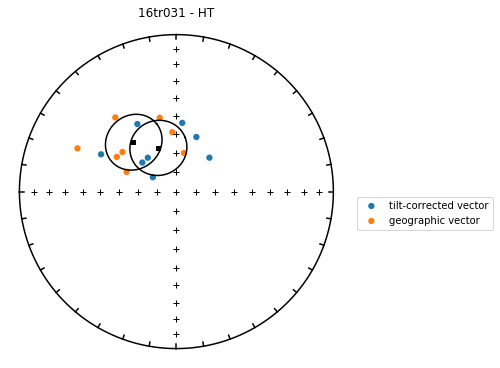

In [123]:
this_site = '16tr031'
this_strike = 11.0
this_dip = 14.1
is_mean, tc_mean = get_BJ_site_mean(this_site, 'HT', this_strike, this_dip)
BJ_HT_site.append(this_site)
BJ_HT_strike = np.append(BJ_HT_strike, this_strike)
BJ_HT_dip = np.append(BJ_HT_dip, this_dip)
BJ_HT_tc_dec = np.append(BJ_HT_tc_dec, tc_mean['dec'])
BJ_HT_tc_inc = np.append(BJ_HT_tc_inc, tc_mean['inc'])
BJ_HT_tc_a95 = np.append(BJ_HT_tc_a95, tc_mean['alpha95'])
BJ_HT_is_dec = np.append(BJ_HT_is_dec, is_mean['dec'])
BJ_HT_is_inc = np.append(BJ_HT_is_inc, is_mean['inc'])
BJ_HT_is_a95 = np.append(BJ_HT_is_a95, is_mean['alpha95'])
BJ_specimen_plot(this_site, 'HT', this_strike, this_dip)

old bed dip direction = [180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4, 180.4]
old bed dip           = [13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5]

new bed dip direction = 183.10
new bed dip           = 13.50

n vectors = 11
n planes  = 0
tilt-corrected alpha95 = 12.96
geographic     alpha95 = 12.96
tilt-corrected k = 13.38
geographic     k = 13.38


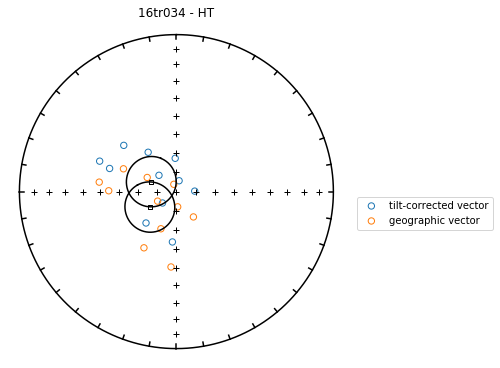

In [124]:
this_site = '16tr034'
this_strike = 93.1
this_dip = 13.5
is_mean, tc_mean = get_BJ_site_mean(this_site, 'HT', this_strike, this_dip)
BJ_HT_site.append(this_site)
BJ_HT_strike = np.append(BJ_HT_strike, this_strike)
BJ_HT_dip = np.append(BJ_HT_dip, this_dip)
BJ_HT_tc_dec = np.append(BJ_HT_tc_dec, tc_mean['dec'])
BJ_HT_tc_inc = np.append(BJ_HT_tc_inc, tc_mean['inc'])
BJ_HT_tc_a95 = np.append(BJ_HT_tc_a95, tc_mean['alpha95'])
BJ_HT_is_dec = np.append(BJ_HT_is_dec, is_mean['dec'])
BJ_HT_is_inc = np.append(BJ_HT_is_inc, is_mean['inc'])
BJ_HT_is_a95 = np.append(BJ_HT_is_a95, is_mean['alpha95'])
BJ_specimen_plot(this_site, 'HT', this_strike, this_dip)

old bed dip direction = [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
old bed dip           = [15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7, 15.7]

new bed dip direction = 102.70
new bed dip           = 15.70

n vectors = 17
n planes  = 0
tilt-corrected alpha95 = 17.25
geographic     alpha95 = 17.25
tilt-corrected k = 5.25
geographic     k = 5.25


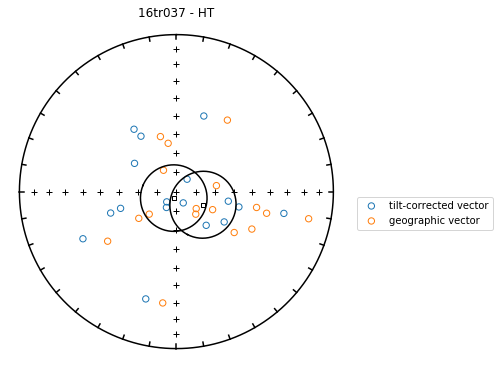

In [125]:
this_site = '16tr037'
this_strike = 12.7
this_dip = 15.7
is_mean, tc_mean = get_BJ_site_mean(this_site, 'HT', this_strike, this_dip)
BJ_HT_site.append(this_site)
BJ_HT_strike = np.append(BJ_HT_strike, this_strike)
BJ_HT_dip = np.append(BJ_HT_dip, this_dip)
BJ_HT_tc_dec = np.append(BJ_HT_tc_dec, tc_mean['dec'])
BJ_HT_tc_inc = np.append(BJ_HT_tc_inc, tc_mean['inc'])
BJ_HT_tc_a95 = np.append(BJ_HT_tc_a95, tc_mean['alpha95'])
BJ_HT_is_dec = np.append(BJ_HT_is_dec, is_mean['dec'])
BJ_HT_is_inc = np.append(BJ_HT_is_inc, is_mean['inc'])
BJ_HT_is_a95 = np.append(BJ_HT_is_a95, is_mean['alpha95'])
BJ_specimen_plot(this_site, 'HT', this_strike, this_dip)

old bed dip direction = [79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0]
old bed dip           = [16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3, 16.3]

new bed dip direction = 81.70
new bed dip           = 16.30

n vectors = 9
n planes  = 0
tilt-corrected alpha95 = 21.22
geographic     alpha95 = 21.22
tilt-corrected k = 6.85
geographic     k = 6.85


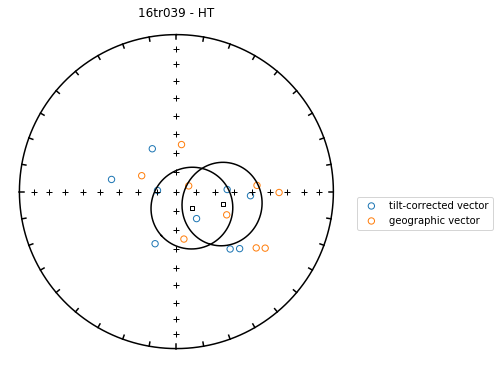

In [126]:
this_site = '16tr039'
this_strike = 351.7
this_dip = 16.3
is_mean, tc_mean = get_BJ_site_mean(this_site, 'HT', this_strike, this_dip)
BJ_HT_site.append(this_site)
BJ_HT_strike = np.append(BJ_HT_strike, this_strike)
BJ_HT_dip = np.append(BJ_HT_dip, this_dip)
BJ_HT_tc_dec = np.append(BJ_HT_tc_dec, tc_mean['dec'])
BJ_HT_tc_inc = np.append(BJ_HT_tc_inc, tc_mean['inc'])
BJ_HT_tc_a95 = np.append(BJ_HT_tc_a95, tc_mean['alpha95'])
BJ_HT_is_dec = np.append(BJ_HT_is_dec, is_mean['dec'])
BJ_HT_is_inc = np.append(BJ_HT_is_inc, is_mean['inc'])
BJ_HT_is_a95 = np.append(BJ_HT_is_a95, is_mean['alpha95'])
BJ_specimen_plot(this_site, 'HT', this_strike, this_dip)

old bed dip direction = [65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1, 65.1]
old bed dip           = [5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2]

new bed dip direction = 67.80
new bed dip           = 5.20

n vectors = 10
n planes  = 0
tilt-corrected alpha95 = 18.37
geographic     alpha95 = 18.37
tilt-corrected k = 7.87
geographic     k = 7.87


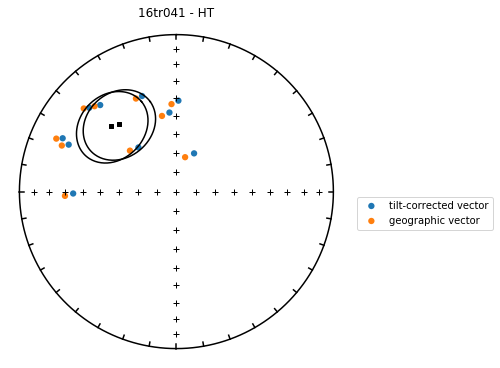

In [127]:
this_site = '16tr041'
this_strike = 337.8
this_dip = 5.2
is_mean, tc_mean = get_BJ_site_mean(this_site, 'HT', this_strike, this_dip)
BJ_HT_site.append(this_site)
BJ_HT_strike = np.append(BJ_HT_strike, this_strike)
BJ_HT_dip = np.append(BJ_HT_dip, this_dip)
BJ_HT_tc_dec = np.append(BJ_HT_tc_dec, tc_mean['dec'])
BJ_HT_tc_inc = np.append(BJ_HT_tc_inc, tc_mean['inc'])
BJ_HT_tc_a95 = np.append(BJ_HT_tc_a95, tc_mean['alpha95'])
BJ_HT_is_dec = np.append(BJ_HT_is_dec, is_mean['dec'])
BJ_HT_is_inc = np.append(BJ_HT_is_inc, is_mean['inc'])
BJ_HT_is_a95 = np.append(BJ_HT_is_a95, is_mean['alpha95'])
BJ_specimen_plot(this_site, 'HT', this_strike, this_dip)

Geographic:

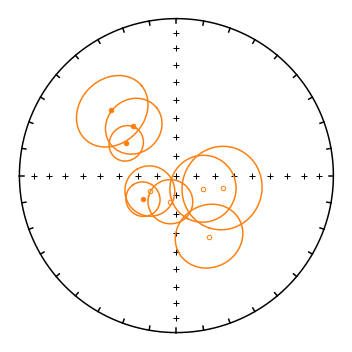

In [128]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
for i in range(len(BJ_HT_is_dec)):
    ipmag.plot_di_mean(BJ_HT_is_dec[i], BJ_HT_is_inc[i], BJ_HT_is_a95[i], color='C1')
plt.show()

Tilt-corrected:

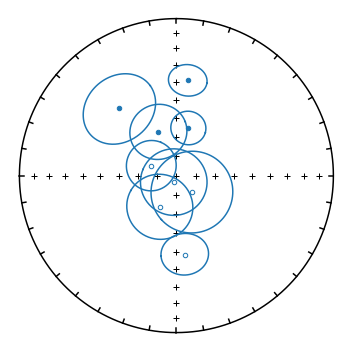

In [129]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
for i in range(len(BJ_HT_tc_dec)):
    ipmag.plot_di_mean(BJ_HT_tc_dec[i], BJ_HT_tc_inc[i], BJ_HT_tc_a95[i], color='C0')
plt.show()

### Together

Build up a summary list with coherent directions.

First the Berkeley data.

TR002 and TR028 are outliers - remove them for now.
* TR002 has stable and consistent HT behaviour, but the direction is not consistent with the other sites
* TR028 has stable and consistent HT behaviour within some of the samples, but the direction is not consistent with the other sites

In [130]:
good_site_list = ['TR014',
                  'TR018',
                  'TR020',
                  'TR024',
                  'TR026',
                  'TR035',
                  'TR042']

good_HT_tc_dec = np.array([])
good_HT_tc_inc = np.array([])
good_HT_tc_a95 = np.array([])
good_HT_is_dec = np.array([])
good_HT_is_inc = np.array([])
good_HT_is_a95 = np.array([])

for i in range(len(good_site_list)):
    this_HT_tc = HT_tc[HT_tc['site']==good_site_list[i]]
    this_HT_is = HT_is[HT_is['site']==good_site_list[i]]
    
    good_HT_tc_dec = np.append(good_HT_tc_dec, this_HT_tc['dir_dec'].tolist())
    good_HT_tc_inc = np.append(good_HT_tc_inc, this_HT_tc['dir_inc'].tolist())
    good_HT_tc_a95 = np.append(good_HT_tc_a95, this_HT_tc['dir_alpha95'].tolist())
    
    good_HT_is_dec = np.append(good_HT_is_dec, this_HT_is['dir_dec'].tolist())
    good_HT_is_inc = np.append(good_HT_is_inc, this_HT_is['dir_inc'].tolist())
    good_HT_is_a95 = np.append(good_HT_is_a95, this_HT_is['dir_alpha95'].tolist())

Add TR004 manually, since it was a dual polarity site:

In [131]:
good_HT_tc_dec = np.append(good_HT_tc_dec, TR004a_tc_HT_mean['dec'])
good_HT_tc_inc = np.append(good_HT_tc_inc, TR004a_tc_HT_mean['inc'])
good_HT_tc_a95 = np.append(good_HT_tc_a95, TR004a_tc_HT_mean['alpha95'])

good_HT_is_dec = np.append(good_HT_is_dec, TR004a_is_HT_mean['dec'])
good_HT_is_inc = np.append(good_HT_is_inc, TR004a_is_HT_mean['inc'])
good_HT_is_a95 = np.append(good_HT_is_a95, TR004a_is_HT_mean['alpha95'])

good_HT_tc_dec = np.append(good_HT_tc_dec, TR004b_tc_HT_mean['dec'])
good_HT_tc_inc = np.append(good_HT_tc_inc, TR004b_tc_HT_mean['inc'])
good_HT_tc_a95 = np.append(good_HT_tc_a95, TR004b_tc_HT_mean['alpha95'])

good_HT_is_dec = np.append(good_HT_is_dec, TR004b_is_HT_mean['dec'])
good_HT_is_inc = np.append(good_HT_is_inc, TR004b_is_HT_mean['inc'])
good_HT_is_a95 = np.append(good_HT_is_a95, TR004b_is_HT_mean['alpha95'])

The Beijing data.

TR001, TR015, and TR041 are outliers - remove them for now.

* TR001 has stable and consistent HT behaviour, but the direction is not consistent with the other sites
* TR015 has stable and consistent HT behaviour that appears identical to the site immediately adjacent to it (TR014), but is slightly offset - given that the distribution of the HT component is so similar between the two sites and that both sites were collected within a 4m interval of stratigraphy, it suggests that one of the sites has some systematic offset - given that TR014 is a direction that is more consistent with other sites, we drop TR015.
* TR041 has many samples in which the entire thermal demagnetization behaviour can be described by a single vector, so the HT component is often not clearly distinguishable from a LT component - perhaps a pervasive overprint.

In [132]:
good_BJ_site_list = ['16tr007',
                     '16tr021',
                     '16tr031',
                     '16tr034',
                     '16tr037',
                     '16tr039']

for i in range(len(BJ_HT_site)):
    if BJ_HT_site[i] in good_BJ_site_list:
        good_HT_tc_dec = np.append(good_HT_tc_dec, BJ_HT_tc_dec[i])
        good_HT_tc_inc = np.append(good_HT_tc_inc, BJ_HT_tc_inc[i])
        good_HT_tc_a95 = np.append(good_HT_tc_a95, BJ_HT_tc_a95[i])
        good_HT_is_dec = np.append(good_HT_is_dec, BJ_HT_is_dec[i])
        good_HT_is_inc = np.append(good_HT_is_inc, BJ_HT_is_inc[i])
        good_HT_is_a95 = np.append(good_HT_is_a95, BJ_HT_is_a95[i])

Plot:

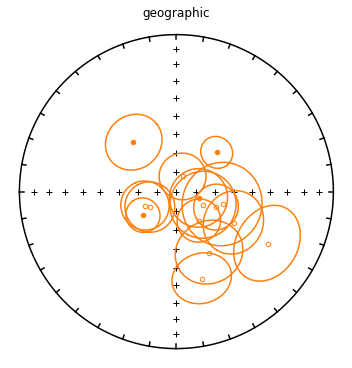

In [133]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
for i in range(len(good_HT_is_dec)):
    ipmag.plot_di_mean(good_HT_is_dec[i], good_HT_is_inc[i], good_HT_is_a95[i], color='C1')
plt.title('geographic')
plt.savefig('./Output/Banxi_site_mean_geographic.pdf', bbox_inches='tight')
plt.show()

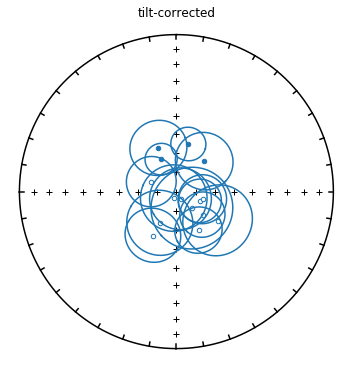

In [134]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
for i in range(len(good_HT_tc_dec)):
    ipmag.plot_di_mean(good_HT_tc_dec[i], good_HT_tc_inc[i], good_HT_tc_a95[i], color='C0')
plt.title('tilt-corrected')
plt.savefig('./Output/Banxi_site_mean_tilt_corrected.pdf', bbox_inches='tight')
plt.show()

In [135]:
good_HT_is_inc_flipped = []
good_HT_is_dec_flipped = []
good_HT_is_a95_flipped = []
good_HT_tc_inc_flipped = []
good_HT_tc_dec_flipped = []
good_HT_tc_a95_flipped = []

for i in range(len(good_HT_tc_dec)):
    if good_HT_tc_inc[i] > 0:
        good_HT_is_inc_flipped.append(-good_HT_is_inc[i])
        good_HT_is_dec_flipped.append(good_HT_is_dec[i]+180)
        good_HT_tc_inc_flipped.append(-good_HT_tc_inc[i])
        good_HT_tc_dec_flipped.append(good_HT_tc_dec[i]+180)
    else:
        good_HT_is_inc_flipped.append(good_HT_is_inc[i])
        good_HT_is_dec_flipped.append(good_HT_is_dec[i])
        good_HT_tc_inc_flipped.append(good_HT_tc_inc[i])
        good_HT_tc_dec_flipped.append(good_HT_tc_dec[i])
    good_HT_is_a95_flipped.append(good_HT_is_a95[i])
    good_HT_tc_a95_flipped.append(good_HT_tc_a95[i])

good_HT_tc_mean = ipmag.fisher_mean(good_HT_tc_dec_flipped,good_HT_tc_inc_flipped)
good_HT_is_mean = ipmag.fisher_mean(good_HT_is_dec_flipped,good_HT_is_inc_flipped)

print('TILT-CORRECTED')
ipmag.print_direction_mean(good_HT_tc_mean)
print('')
print('GEOGRAPHIC')
ipmag.print_direction_mean(good_HT_is_mean)

TILT-CORRECTED
Dec: 166.7  Inc: -77.0
Number of directions in mean (n): 15
Angular radius of 95% confidence (a_95): 6.9
Precision parameter (k) estimate: 31.6

GEOGRAPHIC
Dec: 141.1  Inc: -72.7
Number of directions in mean (n): 15
Angular radius of 95% confidence (a_95): 12.2
Precision parameter (k) estimate: 10.9


In [136]:
print('predicted latitude = {:.2f}'.format(ipmag.lat_from_inc(good_HT_tc_mean['inc'])))

predicted latitude = -65.29


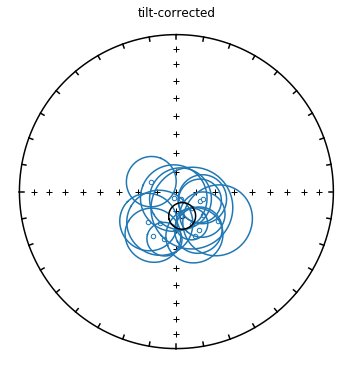

In [137]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
for i in range(len(good_HT_tc_dec_flipped)):
    ipmag.plot_di_mean(good_HT_tc_dec_flipped[i], good_HT_tc_inc_flipped[i], good_HT_tc_a95_flipped[i], color='C0')
ipmag.plot_di_mean(good_HT_tc_mean['dec'], good_HT_tc_mean['inc'], good_HT_tc_mean['alpha95'], color='k')
plt.title('tilt-corrected')
plt.savefig('./Output/Banxi_site_mean_tilt_corrected_flipped.pdf')
plt.show()

VGP with no inclination correction:

In [138]:
pmag.dia_vgp(good_HT_tc_mean['dec']+180,
             -good_HT_tc_mean['inc'],
             good_HT_tc_mean['alpha95'],
             27.95,108.83)

(99.8743692128186, 51.72457188076985, 12.017331521481871, 12.891449702643051)

VGP assuming a flattening factor of 0.6:

In [139]:
pmag.dia_vgp(good_HT_tc_mean['dec']+180,
             np.rad2deg(np.arctan(np.tan(np.deg2rad(-good_HT_tc_mean['inc']))/0.6)),
             good_HT_tc_mean['alpha95'],
             27.95,108.83)

(104.02399132211428, 42.88371381058107, 13.09479500107819, 13.456963962445439)

## Good Specimens

### Together

Berkeley data:

In [140]:
good_HT_tc_dec_spec = np.array([])
good_HT_tc_inc_spec = np.array([])
good_HT_is_dec_spec = np.array([])
good_HT_is_inc_spec = np.array([])

for i in range(len(good_site_list)):
    this_HT_tc = specimens[(specimens['site']==good_site_list[i])&
                           (specimens['dir_comp']=='HT')&
                           (specimens['dir_tilt_correction']==100)].copy()
    this_HT_is = specimens[(specimens['site']==good_site_list[i])&
                           (specimens['dir_comp']=='HT')&
                           (specimens['dir_tilt_correction']==0)].copy()
    
    this_HT_tc_dec_vec = this_HT_tc[this_HT_tc['dir_bfv_dec'].isnull()]['dir_dec'].tolist()
    this_HT_tc_inc_vec = this_HT_tc[this_HT_tc['dir_bfv_dec'].isnull()]['dir_inc'].tolist()
    
    this_HT_is_dec_vec = this_HT_is[this_HT_is['dir_bfv_dec'].isnull()]['dir_dec'].tolist()
    this_HT_is_inc_vec = this_HT_is[this_HT_is['dir_bfv_dec'].isnull()]['dir_inc'].tolist()
    
    this_HT_tc_dec_bfv = this_HT_tc[~this_HT_tc['dir_bfv_dec'].isnull()]['dir_bfv_dec'].tolist()
    this_HT_tc_inc_bfv = this_HT_tc[~this_HT_tc['dir_bfv_dec'].isnull()]['dir_bfv_inc'].tolist()
    
    this_HT_is_dec_bfv = this_HT_is[~this_HT_is['dir_bfv_dec'].isnull()]['dir_bfv_dec'].tolist()
    this_HT_is_inc_bfv = this_HT_is[~this_HT_is['dir_bfv_dec'].isnull()]['dir_bfv_inc'].tolist()
    
    good_HT_tc_dec_spec = np.append(good_HT_tc_dec_spec, this_HT_tc_dec_vec + this_HT_tc_dec_bfv)
    good_HT_tc_inc_spec = np.append(good_HT_tc_inc_spec, this_HT_tc_inc_vec + this_HT_tc_inc_bfv)
    
    good_HT_is_dec_spec = np.append(good_HT_is_dec_spec, this_HT_is_dec_vec + this_HT_is_dec_bfv)
    good_HT_is_inc_spec = np.append(good_HT_is_inc_spec, this_HT_is_inc_vec + this_HT_is_inc_bfv)

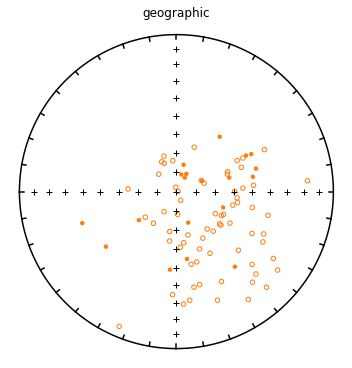

In [141]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
for i in range(len(good_HT_is_dec_spec)):
    ipmag.plot_di(good_HT_is_dec_spec[i], good_HT_is_inc_spec[i], color='C1')
plt.title('geographic')
plt.show()

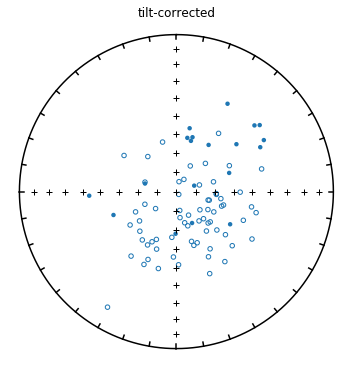

In [142]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
for i in range(len(good_HT_tc_dec_spec)):
    ipmag.plot_di(good_HT_tc_dec_spec[i], good_HT_tc_inc_spec[i], color='C0')
plt.title('tilt-corrected')
plt.show()

Beijing data:

In [143]:
for i in range(len(BJ_HT_site)):
    if BJ_HT_site[i] in good_BJ_site_list:
        this_HT_is = specimensBJ[(specimensBJ['site']==BJ_HT_site[i])&
                                 (specimensBJ['dir_comp']=='HT')&
                                 (specimensBJ['dir_tilt_correction']==0)].copy()
        
        this_HT_is_dec_vec = this_HT_is[this_HT_is['dir_bfv_dec'].isnull()]['dir_dec'].tolist()
        this_HT_is_inc_vec = this_HT_is[this_HT_is['dir_bfv_dec'].isnull()]['dir_inc'].tolist()        
        
        this_HT_is_dec_bfv = this_HT_is[~this_HT_is['dir_bfv_dec'].isnull()]['dir_bfv_dec'].tolist()
        this_HT_is_inc_bfv = this_HT_is[~this_HT_is['dir_bfv_dec'].isnull()]['dir_bfv_inc'].tolist()
        
        this_HT_is_decs = this_HT_is_dec_vec + this_HT_is_dec_bfv
        this_HT_is_incs = this_HT_is_inc_vec + this_HT_is_inc_bfv
        
        for j in range(len(this_HT_is_decs)):
            good_HT_is_dec_spec = np.append(good_HT_is_dec_spec, this_HT_is_decs[j])
            good_HT_is_inc_spec = np.append(good_HT_is_inc_spec, this_HT_is_incs[j])
            tc_dir = pmag.dotilt(this_HT_is_decs[j],this_HT_is_incs[j],(BJ_HT_strike[i]+90)%360,BJ_HT_dip[i])
            good_HT_tc_dec_spec = np.append(good_HT_tc_dec_spec, tc_dir[0])
            good_HT_tc_inc_spec = np.append(good_HT_tc_inc_spec, tc_dir[1])

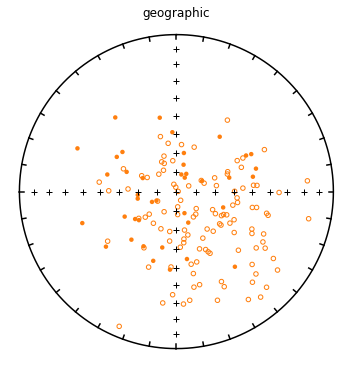

In [144]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
for i in range(len(good_HT_is_dec_spec)):
    ipmag.plot_di(good_HT_is_dec_spec[i], good_HT_is_inc_spec[i], color='C1')
plt.title('geographic')
plt.show()

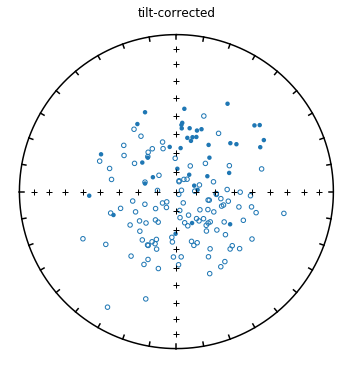

In [145]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
for i in range(len(good_HT_tc_dec_spec)):
    ipmag.plot_di(good_HT_tc_dec_spec[i], good_HT_tc_inc_spec[i], color='C0')
plt.title('tilt-corrected')
plt.show()

Make the data a single polarity:

In [146]:
good_HT_is_inc_spec_flipped = []
good_HT_is_dec_spec_flipped = []
good_HT_tc_inc_spec_flipped = []
good_HT_tc_dec_spec_flipped = []

for i in range(len(good_HT_tc_dec_spec)):
    if good_HT_tc_inc_spec[i] > 0:
        good_HT_is_inc_spec_flipped.append(-good_HT_is_inc_spec[i])
        good_HT_is_dec_spec_flipped.append(good_HT_is_dec_spec[i]+180)
        good_HT_tc_inc_spec_flipped.append(-good_HT_tc_inc_spec[i])
        good_HT_tc_dec_spec_flipped.append(good_HT_tc_dec_spec[i]+180)
    else:
        good_HT_is_inc_spec_flipped.append(good_HT_is_inc_spec[i])
        good_HT_is_dec_spec_flipped.append(good_HT_is_dec_spec[i])
        good_HT_tc_inc_spec_flipped.append(good_HT_tc_inc_spec[i])
        good_HT_tc_dec_spec_flipped.append(good_HT_tc_dec_spec[i])

good_HT_tc_mean_spec = ipmag.fisher_mean(good_HT_tc_dec_spec_flipped,good_HT_tc_inc_spec_flipped)
good_HT_is_mean_spec = ipmag.fisher_mean(good_HT_is_dec_spec_flipped,good_HT_is_inc_spec_flipped)

print('TILT-CORRECTED')
ipmag.print_direction_mean(good_HT_tc_mean_spec)
print('')
print('GEOGRAPHIC')
ipmag.print_direction_mean(good_HT_is_mean_spec)

TILT-CORRECTED
Dec: 178.3  Inc: -76.8
Number of directions in mean (n): 154
Angular radius of 95% confidence (a_95): 4.3
Precision parameter (k) estimate: 8.1

GEOGRAPHIC
Dec: 130.8  Inc: -72.3
Number of directions in mean (n): 154
Angular radius of 95% confidence (a_95): 5.1
Precision parameter (k) estimate: 6.0


In [147]:
print('predicted latitude = {:.2f}'.format(ipmag.lat_from_inc(good_HT_tc_mean_spec['inc'])))

predicted latitude = -64.88


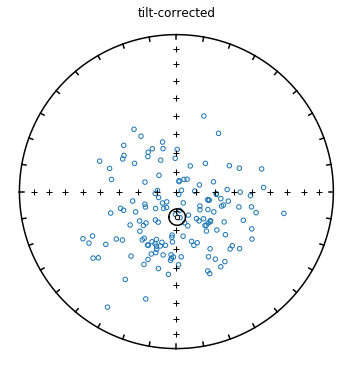

In [148]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
for i in range(len(good_HT_tc_dec_spec_flipped)):
    ipmag.plot_di(good_HT_tc_dec_spec_flipped[i], good_HT_tc_inc_spec_flipped[i], color='C0')
ipmag.plot_di_mean(good_HT_tc_mean_spec['dec'],
                   good_HT_tc_mean_spec['inc'],
                   good_HT_tc_mean_spec['alpha95'],
                   color='k')
plt.title('tilt-corrected')
plt.show()

VGP with no inclination correction:

In [149]:
pmag.dia_vgp(good_HT_tc_mean_spec['dec']+180,
             -good_HT_tc_mean_spec['inc'],
             good_HT_tc_mean_spec['alpha95'],
             27.95,108.83)

(107.6167291985467, 53.05641809080499, 7.379402828472645, 7.935232051414126)

VGP assuming a flattening factor of 0.6:

In [150]:
pmag.dia_vgp(good_HT_tc_mean_spec['dec']+180,
             np.rad2deg(np.arctan(np.tan(np.deg2rad(-good_HT_tc_mean_spec['inc']))/0.6)),
             good_HT_tc_mean_spec['alpha95'],
             27.95,108.83)

(108.18708315471358, 43.65531309094607, 8.063507140047275, 8.294897229792417)

### TR001 and TR002

In [151]:
TR001002_HT_tc_dec_spec = np.array([])
TR001002_HT_tc_inc_spec = np.array([])

# Berkeley: TR002
this_HT_tc = specimens[(specimens['dir_comp']=='HT')&
                       (specimens['dir_tilt_correction']==100)&\
                       (specimens['site']=='TR002')].copy()

this_HT_tc_dec_vec = this_HT_tc[this_HT_tc['dir_bfv_dec'].isnull()]['dir_dec'].tolist()
this_HT_tc_inc_vec = this_HT_tc[this_HT_tc['dir_bfv_dec'].isnull()]['dir_inc'].tolist()

this_HT_tc_dec_bfv = this_HT_tc[~this_HT_tc['dir_bfv_dec'].isnull()]['dir_bfv_dec'].tolist()
this_HT_tc_inc_bfv = this_HT_tc[~this_HT_tc['dir_bfv_dec'].isnull()]['dir_bfv_inc'].tolist()

TR001002_HT_tc_dec_spec = np.append(TR001002_HT_tc_dec_spec, this_HT_tc_dec_vec + this_HT_tc_dec_bfv)
TR001002_HT_tc_inc_spec = np.append(TR001002_HT_tc_inc_spec, this_HT_tc_inc_vec + this_HT_tc_inc_bfv)

# Beijing: TR001
this_HT_is = specimensBJ[(specimensBJ['dir_comp']=='HT')&
                         (specimensBJ['dir_tilt_correction']==0)&\
                         (specimensBJ['site']=='16tr001')].copy()

this_HT_is_dec_vec = this_HT_is[this_HT_is['dir_bfv_dec'].isnull()]['dir_dec'].tolist()
this_HT_is_inc_vec = this_HT_is[this_HT_is['dir_bfv_dec'].isnull()]['dir_inc'].tolist()        

this_HT_is_dec_bfv = this_HT_is[~this_HT_is['dir_bfv_dec'].isnull()]['dir_bfv_dec'].tolist()
this_HT_is_inc_bfv = this_HT_is[~this_HT_is['dir_bfv_dec'].isnull()]['dir_bfv_inc'].tolist()

this_HT_is_decs = this_HT_is_dec_vec + this_HT_is_dec_bfv
this_HT_is_incs = this_HT_is_inc_vec + this_HT_is_inc_bfv

for i in range(len(this_HT_is_decs)):
    tc_dir = pmag.dotilt(this_HT_is_decs[i],this_HT_is_incs[i],(316.9+90)%360,52.2)
    TR001002_HT_tc_dec_spec = np.append(TR001002_HT_tc_dec_spec, tc_dir[0])
    TR001002_HT_tc_inc_spec = np.append(TR001002_HT_tc_inc_spec, tc_dir[1])

In [152]:
TR001002_HT_tc_mean_spec = ipmag.fisher_mean(TR001002_HT_tc_dec_spec,TR001002_HT_tc_inc_spec)

print('TILT-CORRECTED')
ipmag.print_direction_mean(TR001002_HT_tc_mean_spec)

TILT-CORRECTED
Dec: 13.6  Inc: 30.6
Number of directions in mean (n): 15
Angular radius of 95% confidence (a_95): 8.3
Precision parameter (k) estimate: 22.2


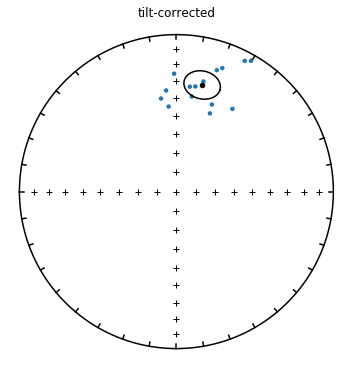

In [153]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
for i in range(len(TR001002_HT_tc_dec_spec)):
    ipmag.plot_di(TR001002_HT_tc_dec_spec[i], TR001002_HT_tc_inc_spec[i], color='C0')
ipmag.plot_di_mean(TR001002_HT_tc_mean_spec['dec'],
                   TR001002_HT_tc_mean_spec['inc'],
                   TR001002_HT_tc_mean_spec['alpha95'],
                   color='k')
plt.title('tilt-corrected')
plt.show()

VGP with no inclination correction:

In [154]:
pmag.dia_vgp(TR001002_HT_tc_mean_spec['dec']+180,
             -TR001002_HT_tc_mean_spec['inc'],
             TR001002_HT_tc_mean_spec['alpha95'],
             27.95,108.83)

(58.44746232596588, -73.00516255286264, 5.145371428423263, 9.236602937404516)

VGP assuming a flattening factor of 0.6:

In [155]:
pmag.dia_vgp(TR001002_HT_tc_mean_spec['dec']+180,
             np.rad2deg(np.arctan(np.tan(np.deg2rad(-TR001002_HT_tc_mean_spec['inc']))/0.6)),
             TR001002_HT_tc_mean_spec['alpha95'],
             27.95,108.83)

(23.746643940754865, -77.79688424731845, 6.575880508522251, 10.44193212277523)

## Fold Test

### Specimens

In [ ]:
spec_test_decs = np.array([])
spec_test_incs = np.array([])
spec_test_dip_dir = np.array([])
spec_test_dip = np.array([])

# Berkeley
specimens_HT = specimens[(specimens['dir_comp']=='HT')&\
                         (specimens['dir_tilt_correction']==0)&\
                         ((specimens['site']=='TR004')|\
                          (specimens['site']=='TR014')|\
                          (specimens['site']=='TR018')|\
                          (specimens['site']=='TR020')|\
                          (specimens['site']=='TR024')|\
                          (specimens['site']=='TR026')|\
                          (specimens['site']=='TR035')|\
                          (specimens['site']=='TR042'))].copy()
specimens_HT.reset_index(drop=True, inplace=True)
for i in range(len(specimens_HT.index)):
    for j in range(len(samples.index)):
        if specimens_HT['sample'][i] == samples['sample'][j]:
            spec_test_decs = np.append(spec_test_decs, specimens_HT['dir_dec'][i])
            spec_test_incs = np.append(spec_test_incs, specimens_HT['dir_inc'][i])
            spec_test_dip_dir = np.append(spec_test_dip_dir, samples['bed_dip_direction'][j])
            spec_test_dip = np.append(spec_test_dip, samples['bed_dip'][j])
            break
            
# Beijing
specimensBJ_HT = specimensBJ[(specimensBJ['dir_comp']=='HT')&\
                             (specimensBJ['dir_tilt_correction']==0)&\
                             ((specimensBJ['site']=='16tr007')|\
                              (specimensBJ['site']=='16tr021')|\
                              (specimensBJ['site']=='16tr031')|\
                              (specimensBJ['site']=='16tr034')|\
                              (specimensBJ['site']=='16tr037')|\
                              (specimensBJ['site']=='16tr039'))].copy()
specimensBJ_HT.reset_index(drop=True, inplace=True)
for i in range(len(specimensBJ_HT)):
    spec_test_decs = np.append(spec_test_decs, specimensBJ_HT['dir_dec'][i])
    spec_test_incs = np.append(spec_test_incs, specimensBJ_HT['dir_inc'][i])
    for j in range(len(BJ_HT_site)):
        if specimensBJ_HT['site'][i] == BJ_HT_site[j]:
            spec_test_dip_dir = np.append(spec_test_dip_dir, (BJ_HT_strike[j]+90)%360)
            spec_test_dip = np.append(spec_test_dip, BJ_HT_dip[j])
            break
        
for i in range(len(spec_test_dip_dir)):
    if spec_test_dip_dir[i]>360:
        spec_test_dip_dir[i]=spec_test_dip_dir[i]-360
        
spec_test_array = ipmag.make_diddd_array(spec_test_decs,spec_test_incs,spec_test_dip_dir,spec_test_dip)

In [ ]:
ipmag.bootstrap_fold_test(spec_test_array)

### Sites

TR035 uses different beddings through the site... not included in analysis for now. The rest of the sites have a single bedding for the whole site.

In [ ]:
site_test_decs = np.array([])
site_test_incs = np.array([])
site_test_dip_dir = np.array([])
site_test_dip = np.array([])

# Berkeley
sites_HT = sites[(sites['dir_comp_name']=='HT')&\
                 (sites['dir_tilt_correction']==0)&\
                 ((sites['site']=='TR014')|\
                  (sites['site']=='TR018')|\
                  (sites['site']=='TR020')|\
                  (sites['site']=='TR024')|\
                  (sites['site']=='TR026')|\
                  (sites['site']=='TR042'))].copy()
sites_HT.reset_index(drop=True, inplace=True)
for i in range(len(sites_HT.index)):
    for j in range(len(samples.index)):
        if sites_HT['site'][i] == samples['site'][j]:
            site_test_decs = np.append(site_test_decs, sites_HT['dir_dec'][i])
            site_test_incs = np.append(site_test_incs, sites_HT['dir_inc'][i])
            site_test_dip_dir = np.append(site_test_dip_dir, samples['bed_dip_direction'][j])
            site_test_dip = np.append(site_test_dip, samples['bed_dip'][j])
            break
            
# TR004a and TR004b
site_test_decs = np.append(site_test_decs, TR004a_is_HT_mean['dec'])
site_test_incs = np.append(site_test_incs, TR004a_is_HT_mean['inc'])
site_test_decs = np.append(site_test_decs, TR004b_is_HT_mean['dec'])
site_test_incs = np.append(site_test_incs, TR004b_is_HT_mean['inc'])
for i in range(len(samples.index)):
    if samples['site'][i] == 'TR004':
        site_test_dip_dir = np.append(site_test_dip_dir, samples['bed_dip_direction'][i])
        site_test_dip_dir = np.append(site_test_dip_dir, samples['bed_dip_direction'][i])
        site_test_dip = np.append(site_test_dip, samples['bed_dip'][i])
        site_test_dip = np.append(site_test_dip, samples['bed_dip'][i])
        break

            
# Beijing
sitesBJ_HT = sitesBJ[(sitesBJ['dir_comp_name']=='HT')&\
                     (sitesBJ['dir_tilt_correction']==0)&\
                     ((sitesBJ['site']=='16tr007')|\
                      (sitesBJ['site']=='16tr021')|\
                      (sitesBJ['site']=='16tr031')|\
                      (sitesBJ['site']=='16tr034')|\
                      (sitesBJ['site']=='16tr037')|\
                      (sitesBJ['site']=='16tr039'))].copy()
sitesBJ_HT.reset_index(drop=True, inplace=True)
for i in range(len(sitesBJ_HT)):
    site_test_decs = np.append(site_test_decs, sitesBJ_HT['dir_dec'][i])
    site_test_incs = np.append(site_test_incs, sitesBJ_HT['dir_inc'][i])
    for j in range(len(BJ_HT_site)):
        if sitesBJ_HT['site'][i] == BJ_HT_site[j]:
            site_test_dip_dir = np.append(site_test_dip_dir, (BJ_HT_strike[j]+90)%360)
            site_test_dip = np.append(site_test_dip, BJ_HT_dip[j])
        
for i in range(len(site_test_dip_dir)):
    if site_test_dip_dir[i]>360:
        site_test_dip_dir[i]=site_test_dip_dir[i]-360
        
site_test_array = ipmag.make_diddd_array(site_test_decs,site_test_incs,site_test_dip_dir,site_test_dip)

In [ ]:
ipmag.bootstrap_fold_test(site_test_array, save=True, save_folder='./Output', fmt='pdf')

### Luoman Local Fold Test

In [ ]:
fold_test_decs = np.array([])
fold_test_incs = np.array([])
fold_test_dip_dir = np.array([])
fold_test_dip = np.array([])

Luoman2_specimen_HT = specimens[(specimens['dir_comp']=='HT')&\
                                (specimens['dir_tilt_correction']==0)&\
                                ((specimens['site']=='TR035')|\
                                 (specimens['site']=='TR036')|\
                                 (specimens['site']=='TR045'))].copy()
Luoman2_specimen_HT.reset_index(drop=True, inplace=True)
for i in range(len(Luoman2_specimen_HT.index)):
    for j in range(len(samples.index)):
        if Luoman2_specimen_HT['sample'][i] == samples['sample'][j]:
            fold_test_decs = np.append(fold_test_decs, Luoman2_specimen_HT['dir_dec'][i])
            fold_test_incs = np.append(fold_test_incs, Luoman2_specimen_HT['dir_inc'][i])
            fold_test_dip_dir = np.append(fold_test_dip_dir, samples['bed_dip_direction'][j])
            fold_test_dip = np.append(fold_test_dip, samples['bed_dip'][j])
            break
            
for i in range(len(fold_test_dip_dir)):
    if fold_test_dip_dir[i]>360:
        fold_test_dip_dir[i]=fold_test_dip_dir[i]-360
        
fold_test_array = ipmag.make_diddd_array(fold_test_decs,fold_test_incs,fold_test_dip_dir,fold_test_dip)

In [ ]:
ipmag.bootstrap_fold_test(fold_test_array)

## Reversal Test

### Specimens

In [ ]:
rev_test_decs = np.array([])
rev_test_incs = np.array([])

# Berkeley
specimens_HT = specimens[(specimens['dir_comp']=='HT')&\
                         (specimens['dir_tilt_correction']==100)&\
                         ((specimens['site']=='TR004')|\
                          (specimens['site']=='TR014')|\
                          (specimens['site']=='TR018')|\
                          (specimens['site']=='TR020')|\
                          (specimens['site']=='TR024')|\
                          (specimens['site']=='TR026')|\
                          (specimens['site']=='TR035')|\
                          (specimens['site']=='TR042'))].copy()
specimens_HT.reset_index(drop=True, inplace=True)
for i in range(len(specimens_HT.index)):
    rev_test_decs = np.append(rev_test_decs, specimens_HT['dir_dec'][i])
    rev_test_incs = np.append(rev_test_incs, specimens_HT['dir_inc'][i])
            
# Beijing
specimensBJ_HT = specimensBJ[(specimensBJ['dir_comp']=='HT')&\
                             (specimensBJ['dir_tilt_correction']==0)&\
                             ((specimensBJ['site']=='16tr007')|\
                              (specimensBJ['site']=='16tr021')|\
                              (specimensBJ['site']=='16tr031')|\
                              (specimensBJ['site']=='16tr034')|\
                              (specimensBJ['site']=='16tr037')|\
                              (specimensBJ['site']=='16tr039'))].copy()
specimensBJ_HT.reset_index(drop=True, inplace=True)
for i in range(len(specimensBJ_HT)):
    rev_test_decs = np.append(rev_test_decs, specimensBJ_HT['dir_dec'][i])
    rev_test_incs = np.append(rev_test_incs, specimensBJ_HT['dir_inc'][i])

In [ ]:
ipmag.reversal_test_MM1990(dec=rev_test_decs, inc=rev_test_incs, plot_CDF=True, plot_stereo=True)

### Sites

In [ ]:
ipmag.reversal_test_MM1990(dec=good_HT_tc_dec, inc=good_HT_tc_inc, plot_CDF=True, plot_stereo=True)

### TR004

In [ ]:
TR004_rev_test_decs = np.array([])
TR004_rev_test_incs = np.array([])

specimens_HT = specimens[(specimens['dir_comp']=='HT')&\
                         (specimens['dir_tilt_correction']==100)&\
                         (specimens['site']=='TR004')].copy()
specimens_HT.reset_index(drop=True, inplace=True)
for i in range(len(specimens_HT.index)):
    if pd.isnull(specimens_HT['dir_bfv_dec'][i]):
        TR004_rev_test_decs = np.append(TR004_rev_test_decs, specimens_HT['dir_dec'][i])
        TR004_rev_test_incs = np.append(TR004_rev_test_incs, specimens_HT['dir_inc'][i])
    else:
        TR004_rev_test_decs = np.append(TR004_rev_test_decs, specimens_HT['dir_bfv_dec'][i])
        TR004_rev_test_incs = np.append(TR004_rev_test_incs, specimens_HT['dir_bfv_inc'][i])

In [ ]:
ipmag.reversal_test_MM1990(dec=TR004_rev_test_decs, inc=TR004_rev_test_incs, plot_CDF=True, plot_stereo=True)

## Elongation/Inclination Analysis

### Specimens

In [ ]:
tilt_corrected_directions = []
for n in range(len(spec_test_decs)):
    tilt_corrected_direction = pmag.dotilt(spec_test_decs[n],spec_test_incs[n],spec_test_dip_dir[n],spec_test_dip[n])
    tilt_corrected_directions.append(tilt_corrected_direction)

In [ ]:
ipmag.find_ei(np.array(tilt_corrected_directions))

In [ ]:
ipmag.unsquish(76,0.6)

### TR014

In [ ]:
tilt_corrected_directions = []
specimens_HT = specimens[(specimens['dir_comp']=='HT')&\
                         (specimens['dir_tilt_correction']==100)&\
                         (specimens['site']=='TR014')].copy()
specimens_HT.reset_index(drop=True, inplace=True)
for i in range(len(specimens_HT)):
    tilt_corrected_directions.append((specimens_HT['dir_dec'][i], specimens_HT['dir_inc'][i]))

In [ ]:
ipmag.find_ei(np.array(tilt_corrected_directions))